#### 노선#23050000로 EDA

In [1]:
import warnings
import matplotlib.pyplot as plt
from dateutil import parser
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# when Tap key is not working...
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv('./train_rev.csv', index_col=[0])
df.tail()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,day
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Monday
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday
415422,415422,2019-09-30,32820000,시내,6115100,서귀포시외버스터미널,33.24873,126.50799,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Monday


#### 새벽에 출근/퇴근하는 패턴을 살펴보자

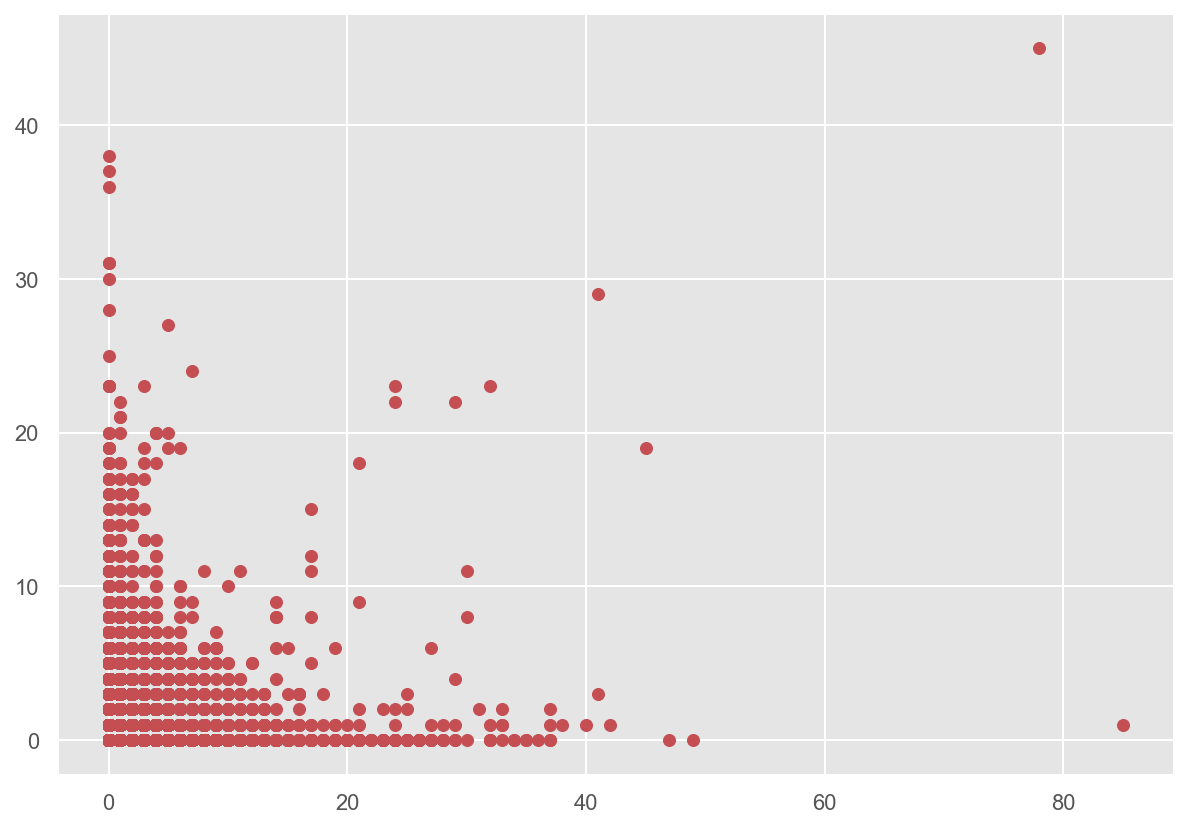

In [4]:
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])
plt.figure(figsize=(10,7))
plt.scatter(df['6~7_ride'], df['6~7_takeoff'], color='r')

#### 80명 이상 승차, 10명 이하 하차를 하는 저 역은 대체 어디?

In [5]:
pd.set_option('display.max_columns', 22)
df[df['6~7_ride']==np.max(df['6~7_ride'])]
# 제6부두, 새벽에 퇴근하는 근로자들이 승차를 많이 한것이 아닐까 추측. 

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,day
158156,158156,2019-09-12,23050000,시내,3112,제6부두,33.5224,126.54445,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Thursday


In [6]:
# 9월 12일 23050000노선의 운행일지
# hypothesis: 이 노선은 여러 번호의 n대의 차량이 운행
# 시내 - Q. 한 노선안에서 시내&시외를 오가는 버스도 있나?
route_1 = df[(df['bus_route_id']==23050000) & (df['date']=='2019-09-12')].reset_index()
route_1

,index,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,day
0,158107,158107,2019-09-12,23050000,시내,1,국제여객선터미널,33.52438,126.54433,0.0,5.0,...,0.0,18.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,35.0,Thursday
1,158108,158108,2019-09-12,23050000,시내,3,오광로입구,33.49546,126.45623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Thursday
2,158109,158109,2019-09-12,23050000,시내,5,이호2동,33.49508,126.46122,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Thursday
3,158110,158110,2019-09-12,23050000,시내,10,노형우체국,33.48709,126.47833,0.0,0.0,...,1.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,Thursday
4,158111,158111,2019-09-12,23050000,시내,28,외도초등학교,33.49390,126.43440,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Thursday
5,158112,158112,2019-09-12,23050000,시내,32,내도동동마을,33.49324,126.44242,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Thursday
6,158113,158113,2019-09-12,23050000,시내,36,현사마을,33.49473,126.44961,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,Thursday
7,158114,158114,2019-09-12,23050000,시내,37,하귀초등학교,33.48022,126.40105,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Thursday
8,158115,158115,2019-09-12,23050000,시내,39,하귀우체국,33.48130,126.40443,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Thursday
9,158116,158116,2019-09-12,23050000,시내,43,남주동,33.48405,126.40876,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thursday


In [14]:
df.pivot_table(index=['bus_route_id', 'date'], aggfunc=[len])

len                                         \
                        10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff   
bus_route_id date                                                           
4270000      2019-09-01       25.0          25.0       25.0          25.0   
             2019-09-02       26.0          26.0       26.0          26.0   
             2019-09-03       28.0          28.0       28.0          28.0   
             2019-09-04       27.0          27.0       27.0          27.0   
             2019-09-05       25.0          25.0       25.0          25.0   
...                            ...           ...        ...           ...   
32820000     2019-09-26        8.0           8.0        8.0           8.0   
             2019-09-27        8.0           8.0        8.0           8.0   
             2019-09-28        6.0           6.0        6.0           6.0   
             2019-09-29        2.0           2.0        2.0           2.0   
             2019-09-30        9.0           9.0        9.0           9.0   

                                                                              \
                        18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff   
bus_route_id date                                                              
4270000      2019-09-01       25.0     25.0        25.0     25.0        25.0   
             2019-09-02       26.0     26.0        26.0     26.0        26.0   
             2019-09-03       28.0     28.0        28.0     28.0        28.0   
             2019-09-04       27.0     27.0        27.0     27.0        27.0   
             2019-09-05       25.0     25.0        25.0     25.0        25.0   
...                            ...      ...         ...      ...         ...   
32820000     2019-09-26        8.0      8.0         8.0      8.0         8.0   
             2019-09-27        8.0      8.0         8.0      8.0         8.0   
             2019-09-28        6.0      6.0         6.0      6.0         6.0   
             2019-09-29        2.0      2.0         2.0      2.0         2.0   
             2019-09-30        9.0      9.0         9.0      9.0         9.0   

                                                                             \
                        8~9_ride 8~9_takeoff 9~10_ride 9~10_takeoff day  id   
bus_route_id date                                                             
4270000      2019-09-01     25.0        25.0      25.0         25.0  25  25   
             2019-09-02     26.0        26.0      26.0         26.0  26  26   
             2019-09-03     28.0        28.0      28.0         28.0  28  28   
             2019-09-04     27.0        27.0      27.0         27.0  27  27   
             2019-09-05     25.0        25.0      25.0         25.0  25  25   
...                          ...         ...       ...          ...  ..  ..   
32820000     2019-09-26      8.0         8.0       8.0          8.0   8   8   
             2019-09-27      8.0         8.0       8.0          8.0   8   8   
             2019-09-28      6.0         6.0       6.0          6.0   6   6   
             2019-09-29      2.0         2.0       2.0          2.0   2   2   
             2019-09-30      9.0         9.0       9.0          9.0   9   9   

                                                                             
                        in_out latitude longitude station_code station_name  
bus_route_id date                                                            
4270000      2019-09-01     25     25.0      25.0           25           25  
             2019-09-02     26     26.0      26.0           26           26  
             2019-09-03     28     28.0      28.0           28           28  
             2019-09-04     27     27.0      27.0           27           27  
             2019-09-05     25     25.0      25.0           25           25  
...                        ...      ...       ...          ...          ...  
32820000     2019-09-2

In [24]:
# 하루 평균 몇개의 노선이 운행되었나?
# 중위수가 21개?

In [16]:
df.pivot_table(index=[ 'date', 'bus_route_id',], aggfunc=[len]).describe()

len                                                          \
         10~11_ride 10~11_takeoff    11~12_ride 11~12_takeoff    18~20_ride   
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000   
mean      26.566669     26.566669     26.566669     26.566669     26.566669   
std       22.682733     22.682733     22.682733     22.682733     22.682733   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       10.000000     10.000000     10.000000     10.000000     10.000000   
50%       21.000000     21.000000     21.000000     21.000000     21.000000   
75%       39.000000     39.000000     39.000000     39.000000     39.000000   
max      165.000000    165.000000    165.000000    165.000000    165.000000   

                                                                             \
           6~7_ride   6~7_takeoff      7~8_ride   7~8_takeoff      8~9_ride   
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000   
mean      26.566669     26.566669     26.566669     26.566669     26.566669   
std       22.682733     22.682733     22.682733     22.682733     22.682733   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       10.000000     10.000000     10.000000     10.000000     10.000000   
50%       21.000000     21.000000     21.000000     21.000000     21.000000   
75%       39.000000     39.000000     39.000000     39.000000     39.000000   
max      165.000000    165.000000    165.000000    165.000000    165.000000   

                                                                             \
        8~9_takeoff     9~10_ride  9~10_takeoff           day            id   
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000   
mean      26.566669     26.566669     26.566669     26.566669     26.566669   
std       22.682733     22.682733     22.682733     22.682733     22.682733   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       10.000000     10.000000     10.000000     10.000000     10.000000   
50%       21.000000     21.000000     21.000000     21.000000     21.000000   
75%       39.000000     39.000000     39.000000     39.000000     39.000000   
max      165.000000    165.000000    165.000000    165.000000    165.000000   

                                                                             
             in_out      latitude     longitude  station_code  station_name  
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000  
mean      26.566669     26.566669     26.566669     26.566669     26.566669  
std       22.682733     22.682733     22.682733     22.682733     22.682733  
min        1.000000      1.000000      1.000000      1.000000      1.000000  
25%       10.000000     10.000000     10.000000     10.000000     10.000000  
50%       21.000000     21.000000     21.000000     21.000000     21.000000  
75%       39.000000     39.000000     39.000000     39.000000     39.000000  
max      165.000000    165.000000    165.000000    165.000000    165.000000

In [30]:
# 난 일자별->노선별->개별 노선에 대한 정류장 count를 원하는게 아니다.
# 난 일자별->노선 count를 알고 싶다. 
df.pivot_table(index=[ 'date', 'bus_route_id',], aggfunc=[len])

len                                         \
                        10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff   
date       bus_route_id                                                     
2019-09-01 4270000            25.0          25.0       25.0          25.0   
           4280000            34.0          34.0       34.0          34.0   
           8170000             9.0           9.0        9.0           9.0   
           8180000            12.0          12.0       12.0          12.0   
           17010000            1.0           1.0        1.0           1.0   
...                            ...           ...        ...           ...   
2019-09-30 32730000           16.0          16.0       16.0          16.0   
           32740000           49.0          49.0       49.0          49.0   
           32760000           19.0          19.0       19.0          19.0   
           32810000            3.0           3.0        3.0           3.0   
           32820000            9.0           9.0        9.0           9.0   

                                                                              \
                        18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff   
date       bus_route_id                                                        
2019-09-01 4270000            25.0     25.0        25.0     25.0        25.0   
           4280000            34.0     34.0        34.0     34.0        34.0   
           8170000             9.0      9.0         9.0      9.0         9.0   
           8180000            12.0     12.0        12.0     12.0        12.0   
           17010000            1.0      1.0         1.0      1.0         1.0   
...                            ...      ...         ...      ...         ...   
2019-09-30 32730000           16.0     16.0        16.0     16.0        16.0   
           32740000           49.0     49.0        49.0     49.0        49.0   
           32760000           19.0     19.0        19.0     19.0        19.0   
           32810000            3.0      3.0         3.0      3.0         3.0   
           32820000            9.0      9.0         9.0      9.0         9.0   

                                                                             \
                        8~9_ride 8~9_takeoff 9~10_ride 9~10_takeoff day  id   
date       bus_route_id                                                       
2019-09-01 4270000          25.0        25.0      25.0         25.0  25  25   
           4280000          34.0        34.0      34.0         34.0  34  34   
           8170000           9.0         9.0       9.0          9.0   9   9   
           8180000          12.0        12.0      12.0         12.0  12  12   
           17010000          1.0         1.0       1.0          1.0   1   1   
...                          ...         ...       ...          ...  ..  ..   
2019-09-30 32730000         16.0        16.0      16.0         16.0  16  16   
           32740000         49.0        49.0      49.0         49.0  49  49   
           32760000         19.0        19.0      19.0         19.0  19  19   
           32810000          3.0         3.0       3.0          3.0   3   3   
           32820000          9.0         9.0       9.0          9.0   9   9   

                                                                             
                        in_out latitude longitude station_code station_name  
date       bus_route_id                                                      
2019-09-01 4270000          25     25.0      25.0           25           25  
           4280000          34     34.0      34.0           34           34  
           8170000           9      9.0       9.0            9            9  
           8180000          12     12.0      12.0           12           12  
           17010000          1      1.0       1.0            1            1  
...                        ...      ...       ...          ...          ...  
2019-09-30 32730000   

In [25]:
route_per_day = df.pivot_table(index=[ 'date', 'bus_route_id',], aggfunc=[len]).reset_index()
route_per_day

date bus_route_id        len                           \
                               10~11_ride 10~11_takeoff 11~12_ride   
0      2019-09-01      4270000       25.0          25.0       25.0   
1      2019-09-01      4280000       34.0          34.0       34.0   
2      2019-09-01      8170000        9.0           9.0        9.0   
3      2019-09-01      8180000       12.0          12.0       12.0   
4      2019-09-01     17010000        1.0           1.0        1.0   
...           ...          ...        ...           ...        ...   
15632  2019-09-30     32730000       16.0          16.0       16.0   
15633  2019-09-30     32740000       49.0          49.0       49.0   
15634  2019-09-30     32760000       19.0          19.0       19.0   
15635  2019-09-30     32810000        3.0           3.0        3.0   
15636  2019-09-30     32820000        9.0           9.0        9.0   

                                                                          \
      11~12_takeoff 18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff   
0              25.0       25.0     25.0        25.0     25.0        25.0   
1              34.0       34.0     34.0        34.0     34.0        34.0   
2               9.0        9.0      9.0         9.0      9.0         9.0   
3              12.0       12.0     12.0        12.0     12.0        12.0   
4               1.0        1.0      1.0         1.0      1.0         1.0   
...             ...        ...      ...         ...      ...         ...   
15632          16.0       16.0     16.0        16.0     16.0        16.0   
15633          49.0       49.0     49.0        49.0     49.0        49.0   
15634          19.0       19.0     19.0        19.0     19.0        19.0   
15635           3.0        3.0      3.0         3.0      3.0         3.0   
15636           9.0        9.0      9.0         9.0      9.0         9.0   

                                                                           \
      8~9_ride 8~9_takeoff 9~10_ride 9~10_takeoff day  id in_out latitude   
0         25.0        25.0      25.0         25.0  25  25     25     25.0   
1         34.0        34.0      34.0         34.0  34  34     34     34.0   
2          9.0         9.0       9.0          9.0   9   9      9      9.0   
3         12.0        12.0      12.0         12.0  12  12     12     12.0   
4          1.0         1.0       1.0          1.0   1   1      1      1.0   
...        ...         ...       ...          ...  ..  ..    ...      ...   
15632     16.0        16.0      16.0         16.0  16  16     16     16.0   
15633     49.0        49.0      49.0         49.0  49  49     49     49.0   
15634     19.0        19.0      19.0         19.0  19  19     19     19.0   
15635      3.0         3.0       3.0          3.0   3   3      3      3.0   
15636      9.0         9.0       9.0          9.0   9   9      9      9.0   

                                           
      longitude station_code station_name  
0          25.0           25           25  
1          34.0           34           34  
2           9.0            9            9  
3          12.0           12           12  
4           1.0            1            1  
...         ...          ...          ...  
15632      16.0           16           16  
15633      49.0           49           49  
15634      19.0           19           19  
15635       3.0            3            3  
15636       9.0            9            9  

[15637 rows x 22 columns]

In [28]:
# 난 일자별->노선 count를 알고 싶다.
# 얻었다. 일자별 노선 count.
route_per_day.pivot_table(index=[ 'date', ], aggfunc=[len])

len                                                    \
           bus_route_id        len                                          
                        10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff   
date                                                                        
2019-09-01          496      496.0         496.0      496.0         496.0   
2019-09-02          534      534.0         534.0      534.0         534.0   
2019-09-03          545      545.0         545.0      545.0         545.0   
2019-09-04          540      540.0         540.0      540.0         540.0   
2019-09-05          538      538.0         538.0      538.0         538.0   
2019-09-06          537      537.0         537.0      537.0         537.0   
2019-09-07          480      480.0         480.0      480.0         480.0   
2019-09-08          502      502.0         502.0      502.0         502.0   
2019-09-09          542      542.0         542.0      542.0         542.0   
2019-09-10          541      541.0         541.0      541.0         541.0   
2019-09-11          537      537.0         537.0      537.0         537.0   
2019-09-12          501      501.0         501.0      501.0         501.0   
2019-09-13          481      481.0         481.0      481.0         481.0   
2019-09-14          496      496.0         496.0      496.0         496.0   
2019-09-15          489      489.0         489.0      489.0         489.0   
2019-09-16          534      534.0         534.0      534.0         534.0   
2019-09-17          545      545.0         545.0      545.0         545.0   
2019-09-18          540      540.0         540.0      540.0         540.0   
2019-09-19          543      543.0         543.0      543.0         543.0   
2019-09-20          538      538.0         538.0      538.0         538.0   
2019-09-21          498      498.0         498.0      498.0         498.0   
2019-09-22          429      429.0         429.0      429.0         429.0   
2019-09-23          539      539.0         539.0      539.0         539.0   
2019-09-24          542      542.0         542.0      542.0         542.0   
2019-09-25          542      542.0         542.0      542.0         542.0   
2019-09-26          534      534.0         534.0      534.0         534.0   
2019-09-27          546      546.0         546.0      546.0         546.0   
2019-09-28          509      509.0         509.0      509.0         509.0   
2019-09-29          506      506.0         506.0      506.0         506.0   
2019-09-30          533      533.0         533.0      533.0         533.0   

                                                                          \
                                                                           
           18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff 8~9_ride   
date                                                                       
2019-09-01      496.0    496.0       496.0    496.0       496.0    496.0   
2019-09-02      534.0    534.0       534.0    534.0       534.0    534.0   
2019-09-03      545.0    545.0       545.0    545.0       545.0    545.0   
2019-09-04      540.0    540.0       540.0    540.0       540.0    540.0   
2019-09-05      538.0    538.0       538.0    538.0       538.0    538.0   
2019-09-06      537.0    537.0       537.0    537.0       537.0    537.0   
2019-09-07      480.0    480.0       480.0    480.0       480.0    480.0   
2019-09-08      502.0    502.0       502.0    502.0       502.0    502.0   
2019-09-09      542.0    542.0       542.0    542.0       542.0    542.0   
2019-09-10      541.0    541.0       541.0    541.0       541.0    541.0   
2019-09-11      537.0    537.0       537.0    537.0       537.0    537.0   
2019-09-12      501.0    501.0       501.0    501.0       501.0    501.0   
2019-09-13      481.0    481.0       481.0    481.0       481.0    481.0   
2019-09-14      496.0    496.0       496.0    496.0       496.0    496.0   
2019-09-15      489.0    489.0   

In [27]:
# 하루 평균 몇개의 노선이 운행되었나?
# 521개의 노선
route_per_day.pivot_table(index=[ 'date', ], aggfunc=[len]).describe()

len                                                      \
      bus_route_id         len                                           
                    10~11_ride 10~11_takeoff  11~12_ride 11~12_takeoff   
count    30.000000   30.000000     30.000000   30.000000     30.000000   
mean    521.233333  521.233333    521.233333  521.233333    521.233333   
std      27.821702   27.821702     27.821702   27.821702     27.821702   
min     429.000000  429.000000    429.000000  429.000000    429.000000   
25%     501.250000  501.250000    501.250000  501.250000    501.250000   
50%     535.500000  535.500000    535.500000  535.500000    535.500000   
75%     540.750000  540.750000    540.750000  540.750000    540.750000   
max     546.000000  546.000000    546.000000  546.000000    546.000000   

                                                                               \
                                                                                
       18~20_ride    6~7_ride 6~7_takeoff    7~8_ride 7~8_takeoff    8~9_ride   
count   30.000000   30.000000   30.000000   30.000000   30.000000   30.000000   
mean   521.233333  521.233333  521.233333  521.233333  521.233333  521.233333   
std     27.821702   27.821702   27.821702   27.821702   27.821702   27.821702   
min    429.000000  429.000000  429.000000  429.000000  429.000000  429.000000   
25%    501.250000  501.250000  501.250000  501.250000  501.250000  501.250000   
50%    535.500000  535.500000  535.500000  535.500000  535.500000  535.500000   
75%    540.750000  540.750000  540.750000  540.750000  540.750000  540.750000   
max    546.000000  546.000000  546.000000  546.000000  546.000000  546.000000   

                                                                    \
                                                                     
      8~9_takeoff   9~10_ride 9~10_takeoff         day          id   
count   30.000000   30.000000    30.000000   30.000000   30.000000   
mean   521.233333  521.233333   521.233333  521.233333  521.233333   
std     27.821702   27.821702    27.821702   27.821702   27.821702   
min    429.000000  429.000000   429.000000  429.000000  429.000000   
25%    501.250000  501.250000   501.250000  501.250000  501.250000   
50%    535.500000  535.500000   535.500000  535.500000  535.500000   
75%    540.750000  540.750000   540.750000  540.750000  540.750000   
max    546.000000  546.000000   546.000000  546.000000  546.000000   

                                                                     
                                                                     
           in_out    latitude   longitude station_code station_name  
count   30.000000   30.000000   30.000000    30.000000    30.000000  
mean   521.233333  521.233333  521.233333   521.233333   521.233333  
std     27.821702   27.821702   27.821702    27.821702    27.821702  
min    429.000000  429.000000  429.000000   429.000000   429.000000  
25%    501.250000  501.250000  501.250000   501.250000   501.250000  
50%    535.500000  535.500000  535.500000   535.500000   535.500000  
75%    540.750000  540.750000  540.750000   540.750000   540.750000  
max    546.000000  546.000000  546.000000   546.000000   546.000000

In [9]:
# 79개 정류소가 해당 노선에 있지만, 위에서 보듯이 어떤 날짜는 52개이다. 
# 즉 모든 정류소에 정차하는 승객수의 정보가 포함되어 있지 않은것을 감안하고 시작한다. 
df[df['bus_route_id']==23050000].station_code.value_counts()

321     30
281     30
1463    30
167     30
1355    30
        ..
303      1
307      1
301      1
603      1
85       1
Name: station_code, Length: 79, dtype: int64

In [8]:
df[df['bus_route_id']==23050000].pivot_table(index='date', aggfunc=[len])

len                                                    \
           10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff 18~20_ride   
date                                                                      
2019-09-01       55.0          55.0       55.0          55.0       55.0   
2019-09-02       54.0          54.0       54.0          54.0       54.0   
2019-09-03       55.0          55.0       55.0          55.0       55.0   
2019-09-04       54.0          54.0       54.0          54.0       54.0   
2019-09-05       55.0          55.0       55.0          55.0       55.0   
2019-09-06       58.0          58.0       58.0          58.0       58.0   
2019-09-07       44.0          44.0       44.0          44.0       44.0   
2019-09-08       48.0          48.0       48.0          48.0       48.0   
2019-09-09       55.0          55.0       55.0          55.0       55.0   
2019-09-10       56.0          56.0       56.0          56.0       56.0   
2019-09-11       62.0          62.0       62.0          62.0       62.0   
2019-09-12       52.0          52.0       52.0          52.0       52.0   
2019-09-13       45.0          45.0       45.0          45.0       45.0   
2019-09-14       50.0          50.0       50.0          50.0       50.0   
2019-09-15       53.0          53.0       53.0          53.0       53.0   
2019-09-16       58.0          58.0       58.0          58.0       58.0   
2019-09-17       62.0          62.0       62.0          62.0       62.0   
2019-09-18       62.0          62.0       62.0          62.0       62.0   
2019-09-19       67.0          67.0       67.0          67.0       67.0   
2019-09-20       59.0          59.0       59.0          59.0       59.0   
2019-09-21       50.0          50.0       50.0          50.0       50.0   
2019-09-22       28.0          28.0       28.0          28.0       28.0   
2019-09-23       60.0          60.0       60.0          60.0       60.0   
2019-09-24       55.0          55.0       55.0          55.0       55.0   
2019-09-25       55.0          55.0       55.0          55.0       55.0   
2019-09-26       63.0          63.0       63.0          63.0       63.0   
2019-09-27       60.0          60.0       60.0          60.0       60.0   
2019-09-28       56.0          56.0       56.0          56.0       56.0   
2019-09-29       45.0          45.0       45.0          45.0       45.0   
2019-09-30       59.0          59.0       59.0          59.0       59.0   

                                                                           \
           6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff 8~9_ride 8~9_takeoff   
date                                                                        
2019-09-01     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-02     54.0        54.0     54.0        54.0     54.0        54.0   
2019-09-03     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-04     54.0        54.0     54.0        54.0     54.0        54.0   
2019-09-05     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-06     58.0        58.0     58.0        58.0     58.0        58.0   
2019-09-07     44.0        44.0     44.0        44.0     44.0        44.0   
2019-09-08     48.0        48.0     48.0        48.0     48.0        48.0   
2019-09-09     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-10     56.0        56.0     56.0        56.0     56.0        56.0   
2019-09-11     62.0        62.0     62.0        62.0     62.0        62.0   
2019-09-12     52.0        52.0     52.0        52.0     52.0        52.0   
2019-09-13     45.0        45.0     45.0        45.0     45.0        45.0   
2019-09-14     50.0        50.0     50.0        50.0     50.0        50.0   
2019-09-15     53.0        53.0     53.0        53.0     53.0        53.0   
2019-09-16     58.0        58.0     58.0        58.0     58.0        58.0   
2019-09-17     62.0        62.0     62.0        62.0     62.0        62.0   
20

In [10]:
map_df = route_1[['station_name','latitude', 'longitude']]
map_df

,station_name,latitude,longitude
0,국제여객선터미널,33.52438,126.54433
1,오광로입구,33.49546,126.45623
2,이호2동,33.49508,126.46122
3,노형우체국,33.48709,126.47833
4,외도초등학교,33.49390,126.43440
5,내도동동마을,33.49324,126.44242
6,현사마을,33.49473,126.44961
7,하귀초등학교,33.48022,126.40105
8,하귀우체국,33.48130,126.40443
9,남주동,33.48405,126.40876


In [49]:
import folium

m = folium.Map(location=[33.251030, 126.429880])

for idx, col in map_df.iterrows():
    folium. Marker([col['latitude'], col['longitude']], popup='<i>{}</i>'.format(col['station_name'])).add_to(m) 
       
m.save("route_1.html")

In [5]:
# 해당 노선 시간대별 승/하차 인원
time = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride', ]

dic = {}
for each in time:
    dic[each] = np.sum(route_1[each])
passengers = pd.DataFrame([dic], index=['route_1'])
passengers.T
# 하차 인식 : 7 out of 25. 하차카드 찍는 경우 0.25% -?
# 하차 데이터 자체가 유의미하게 쓰일수 있을지 의문.-?

,route_1
6~7_ride,102.0
7~8_ride,20.0
8~9_ride,47.0
9~10_ride,28.0
10~11_ride,57.0
11~12_ride,40.0
6~7_takeoff,31.0
7~8_takeoff,35.0
8~9_takeoff,24.0
9~10_takeoff,28.0


In [23]:
df.iloc[:, 8:-1]

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 노선별 & 일자별, 승차 인원수!
# 정류소에 대한 정보가 사라진다 ; 정류소별 승객이 몇명인지를 알 수가 없음.
temp = df[['bus_route_id', 'date', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', ]].groupby(['bus_route_id', 'date'],).sum()
temp

6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  \
bus_route_id date                                                              
4270000      2019-09-01       4.0      28.0      18.0       38.0        27.0   
             2019-09-02       3.0      35.0      28.0       37.0        33.0   
             2019-09-03       4.0      41.0      21.0       35.0        32.0   
             2019-09-04       6.0      31.0      30.0       34.0        43.0   
             2019-09-05       7.0      33.0      39.0       38.0        31.0   
...                           ...       ...       ...        ...         ...   
32820000     2019-09-26      10.0       0.0       0.0        0.0         0.0   
             2019-09-27       8.0       0.0       0.0        0.0         0.0   
             2019-09-28       6.0       0.0       0.0        0.0         0.0   
             2019-09-29       3.0       0.0       0.0        0.0         0.0   
             2019-09-30      10.0       0.0       0.0        0.0         0.0   

                         11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
bus_route_id date                                                            
4270000      2019-09-01        41.0          2.0          2.0          4.0   
             2019-09-02        30.0          0.0          5.0         13.0   
             2019-09-03        34.0          0.0          6.0         12.0   
             2019-09-04        19.0          1.0          2.0         13.0   
             2019-09-05        39.0          1.0          6.0          9.0   
...                             ...          ...          ...          ...   
32820000     2019-09-26         0.0          3.0          4.0          3.0   
             2019-09-27         0.0          2.0          5.0          2.0   
             2019-09-28         0.0          1.0          4.0          1.0   
             2019-09-29         0.0          0.0          0.0          3.0   
             2019-09-30         0.0          2.0          2.0          4.0   

                         9~10_takeoff  10~11_takeoff  11~12_takeoff  \
bus_route_id date                                                     
4270000      2019-09-01           4.0           24.0           23.0   
             2019-09-02          17.0           14.0           16.0   
             2019-09-03          10.0           15.0           14.0   
             2019-09-04          11.0           19.0           21.0   
             2019-09-05          10.0           22.0            5.0   
...                               ...            ...            ...   
32820000     2019-09-26           0.0            0.0            0.0   
             2019-09-27           0.0            0.0            0.0   
             2019-09-28           0.0            0.0            0.0   
             2019-09-29           0.0            0.0            0.0   
             2019-09-30           0.0            0.0            0.0   

                         18~20_ride  
bus_route_id date                    
4270000      2019-09-01        79.0  
             2019-09-02        92.0  
             2019-09-03        65.0  
             2019-09-04        58.0  
             2019-09-05        74.0  
...                             ...  
32820000     2019-09-26         0.0  
             2019-09-27         0.0  
             2019-09-28         0.0  
             2019-09-29         0.0  
             2019-09-30         0.0  

[15637 rows x 13 columns]

In [ ]:
# idea 1
운행 노선 갯수 MAX였던 9월 27일(노선갯수 546개, 정류장 갯수 2846개)
해당 날짜로 노선에 대한 EDA진행
# idea 2
승객수가 가장 많았던 9월 10일(92050명)으로 EDA진행

In [8]:
temp = temp.reset_index()
temp

,bus_route_id,date,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,4270000,2019-09-01,4.0,28.0,18.0,38.0,27.0,41.0,2.0,2.0,4.0,4.0,24.0,23.0,79.0
1,4270000,2019-09-02,3.0,35.0,28.0,37.0,33.0,30.0,0.0,5.0,13.0,17.0,14.0,16.0,92.0
2,4270000,2019-09-03,4.0,41.0,21.0,35.0,32.0,34.0,0.0,6.0,12.0,10.0,15.0,14.0,65.0
3,4270000,2019-09-04,6.0,31.0,30.0,34.0,43.0,19.0,1.0,2.0,13.0,11.0,19.0,21.0,58.0
4,4270000,2019-09-05,7.0,33.0,39.0,38.0,31.0,39.0,1.0,6.0,9.0,10.0,22.0,5.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15632,32820000,2019-09-26,10.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0
15633,32820000,2019-09-27,8.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0
15634,32820000,2019-09-28,6.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0
15635,32820000,2019-09-29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [9]:
sep27_route = temp[temp['date'] == '2019-09-27']

In [11]:
df[['bus_route_id', 'in_out']]
# 노선번호 4270000를 보면 알 수 있듯이, 시내와 시외를 다니는 버스가 서로 겹쳐져서 한 노선도를 이루기도 한다.

,bus_route_id,in_out
0,4270000,시외
1,4270000,시외
2,4270000,시외
3,4270000,시내
4,4270000,시내
...,...,...
415418,32820000,시내
415419,32820000,시내
415420,32820000,시내
415421,32820000,시내


In [10]:
# 루트별로 정류소는 다 sum으로 합쳐져서 value에 포함되어졌다.
# 😣이 데이터로 내가 뭘 알아낼수 있을까.

sep27_route

,bus_route_id,date,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
26,4270000,2019-09-27,6.0,26.0,27.0,31.0,32.0,33.0,1.0,3.0,0.0,26.0,22.0,16.0,79.0
56,4280000,2019-09-27,35.0,38.0,67.0,57.0,51.0,66.0,0.0,22.0,35.0,15.0,39.0,24.0,67.0
107,8170000,2019-09-27,4.0,27.0,6.0,9.0,7.0,2.0,3.0,2.0,7.0,5.0,3.0,1.0,47.0
137,8180000,2019-09-27,76.0,44.0,15.0,25.0,11.0,15.0,2.0,55.0,22.0,4.0,12.0,6.0,25.0
161,17010000,2019-09-27,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,32730000,2019-09-27,15.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0
15568,32740000,2019-09-27,0.0,28.0,27.0,4.0,0.0,0.0,0.0,5.0,17.0,21.0,0.0,0.0,0.0
15585,32760000,2019-09-27,13.0,12.0,0.0,0.0,0.0,0.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0
15608,32810000,2019-09-27,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 우선 9월 27일 시간대별 승하차
sep27_route.describe()
# 아침 6-7시 새벽에 출근 혹은 퇴근하시는분들.. : 노선 전체에서 평균 10명, 그치만 최대 131명 (131명 저 노선은 어디)
# 7-8시 : 노선 전체에서 평균 28명 (확실히 이때 출근량이 느는군)
# 8-9시 : 노선 전체에서 평균 27명
# 9-10시 : 19명
# 10-11시 : 17명
# ...
# 특이한점 : 시간대별 편차가 18-20시가 78로 엄청 크다. max도 이 시간은 667명이나 된다. 
# 오전에는 1시간당의 정보였는데에 반해 오후는 2시간당의 정보라서 편차, max의 값이 저렇게 큰것으로 보인다.
😣



,bus_route_id,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,5.460000e+02,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.00000,546.000000,546.000000,546.000000,546.000000
mean,2.716526e+07,10.007326,28.772894,27.461538,19.395604,17.998168,17.256410,3.672161,11.494505,17.74359,13.450549,12.624542,12.135531,35.161172
std,4.165380e+06,16.748872,43.941993,48.233105,37.550224,36.248151,37.907713,7.163147,18.141264,29.60759,24.517628,25.128588,25.419705,78.007360
min,4.270000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.351250e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.786500e+07,2.000000,12.500000,7.000000,4.000000,3.500000,3.000000,0.000000,4.000000,6.00000,3.000000,2.000000,2.000000,3.000000
75%,3.074750e+07,13.000000,36.000000,33.000000,21.000000,19.000000,16.000000,4.000000,15.000000,23.00000,16.000000,14.000000,12.000000,36.750000
max,3.282000e+07,131.000000,323.000000,366.000000,289.000000,309.000000,439.000000,52.000000,150.000000,218.00000,186.000000,190.000000,249.000000,667.000000


In [13]:
# 그냥 데이터 전체를 가져와서 승하차 시간대를 볼때랑은 확실히 다르군
# (뒤죽박죽, 날짜도 어떤날은 있고 없고, 
#  그래서 패턴이 없던 데이터를 일자를 골라주고, 노선을 묶어주니 오히려 데이터의 패턴이 드러나는구나 )
df.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


In [26]:
df.shape
# 세부역으로 구분하면 row가 많아지지만, 그냥 노선/날짜별로만 묶어버리면 rows가 확실히 심플해진다.
# 대신 각 정류소에 대한 정보가 사라진다 ; 정류소별 승객이 몇명인지를 알 수가 없음.
# Rows: 415,423 -> 15,637

(415423, 22)

In [27]:
temp = temp[temp['date'] == '2019-09-12']
temp

,bus_route_id,date,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
11,4270000,2019-09-12,6.0,40.0,19.0,25.0,52.0,38.0,1.0,8.0,8.0,14.0,10.0,14.0,66.0
41,4280000,2019-09-12,25.0,44.0,38.0,51.0,55.0,48.0,1.0,25.0,11.0,24.0,25.0,25.0,59.0
69,7990000,2019-09-12,8.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0
92,8170000,2019-09-12,0.0,3.0,9.0,31.0,7.0,9.0,0.0,0.0,3.0,4.0,18.0,3.0,30.0
122,8180000,2019-09-12,59.0,61.0,38.0,24.0,26.0,28.0,0.0,29.0,40.0,20.0,6.0,11.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15445,32690000,2019-09-12,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0
15474,32700000,2019-09-12,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
15530,32730000,2019-09-12,8.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0
15557,32740000,2019-09-12,0.0,11.0,31.0,0.0,0.0,1.0,0.0,3.0,28.0,0.0,0.0,0.0,0.0


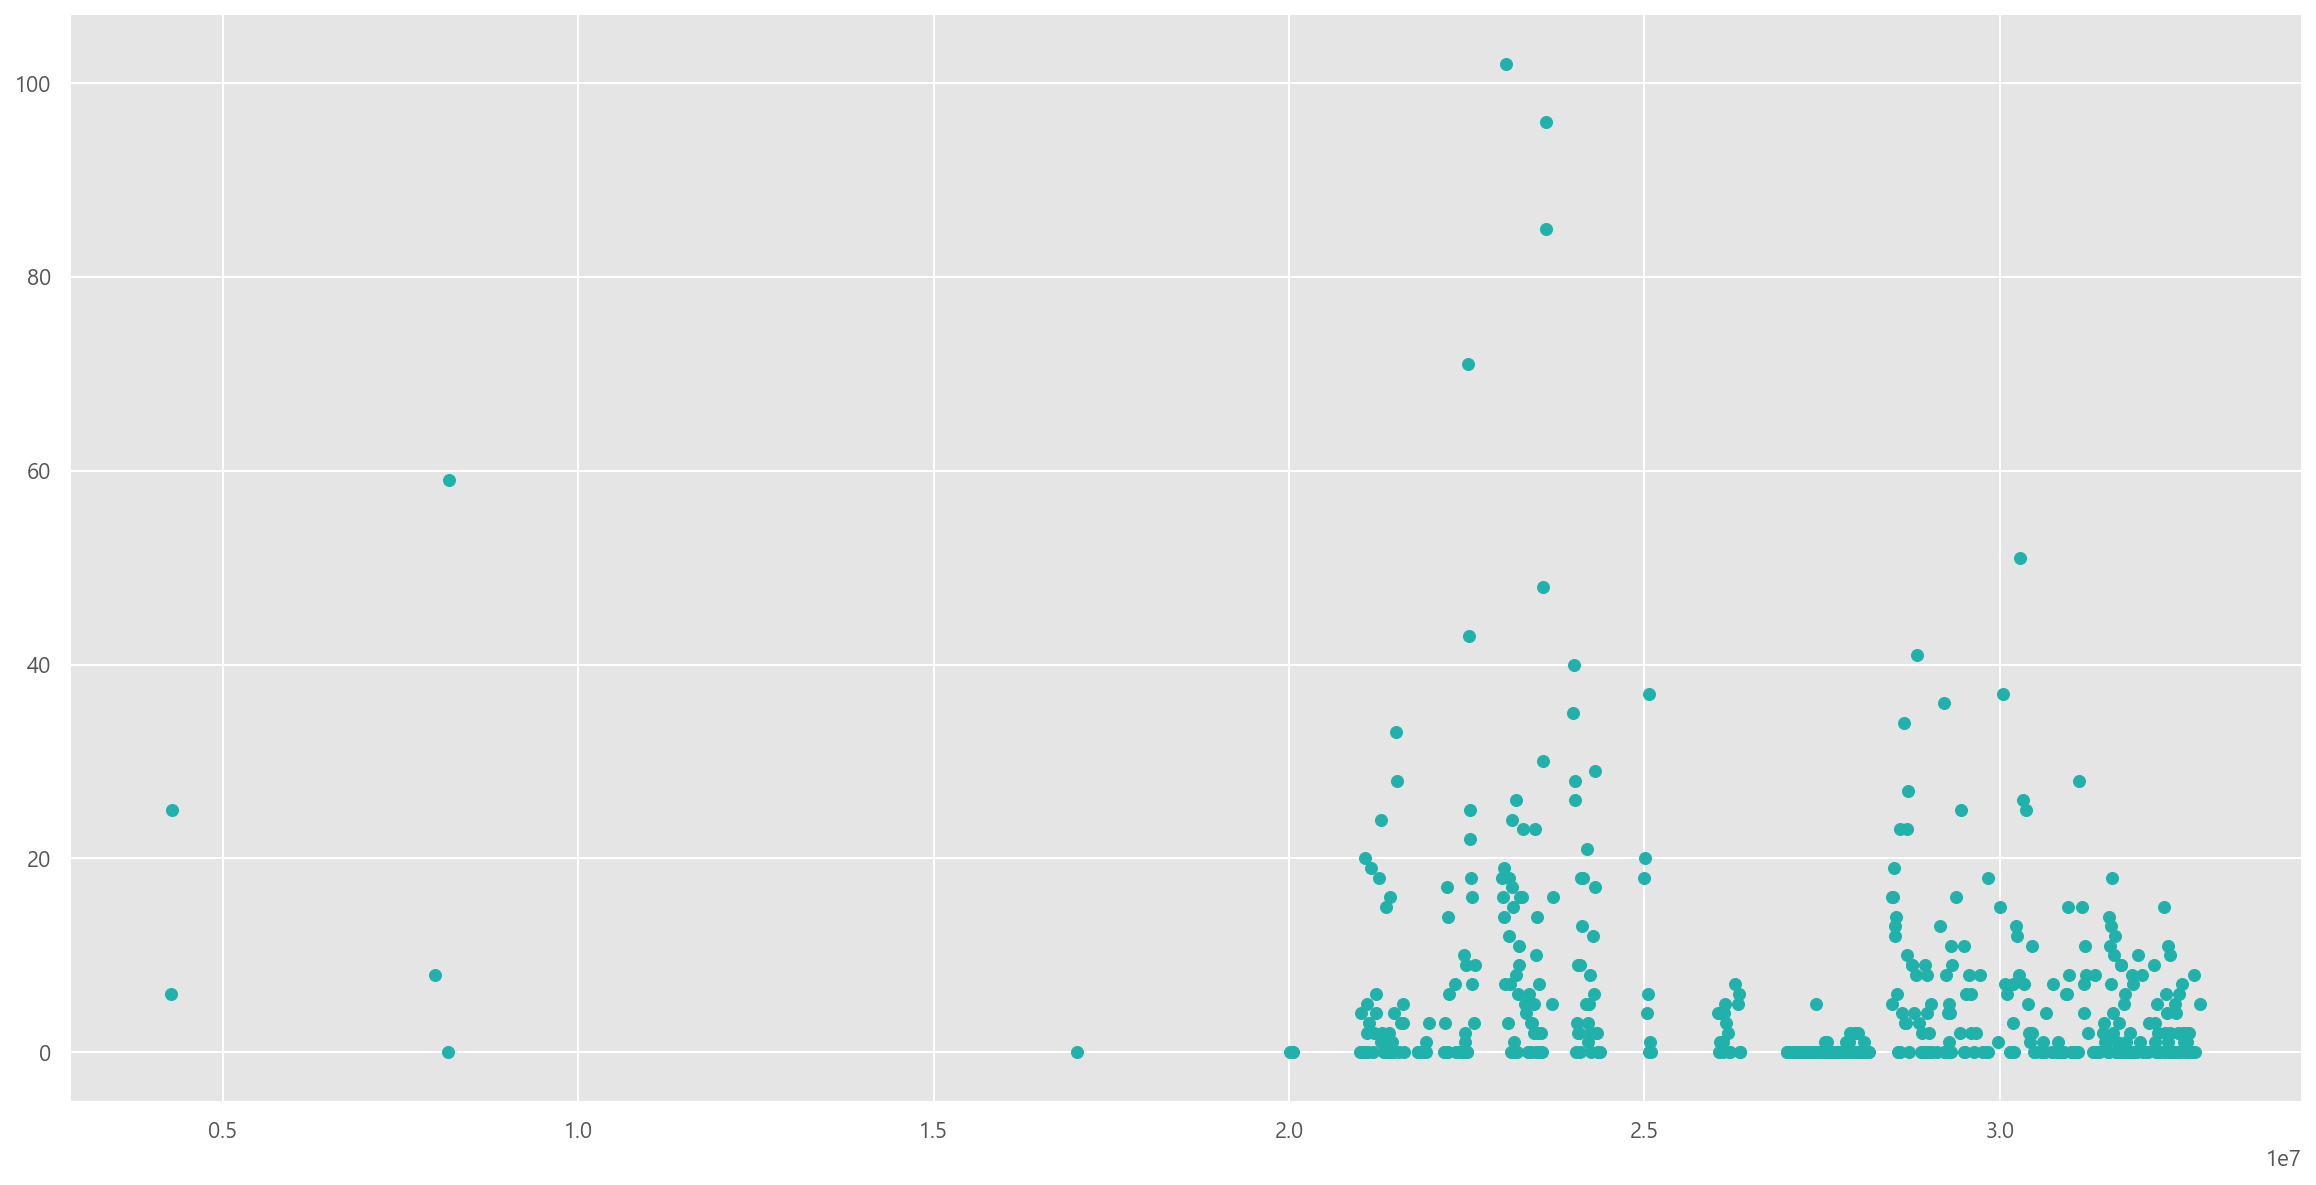

In [85]:
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])
plt.figure(figsize=(20,10))
plt.scatter(temp['bus_route_id'], temp['6~7_ride'], color='lightseagreen')

In [93]:
np.max(temp['6~7_ride'])

102.0

In [119]:
temp[temp['6~7_ride']==102]
# route_1 승차수가 outlier임을 확인

,bus_route_id,date,6~7_ride
2836,23050000,2019-09-12,102.0


In [ ]:
palette = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'darkorange', 'lime', \
                 'lightpink', 'chocolate', 'olivedrab', 'lightseagreen']

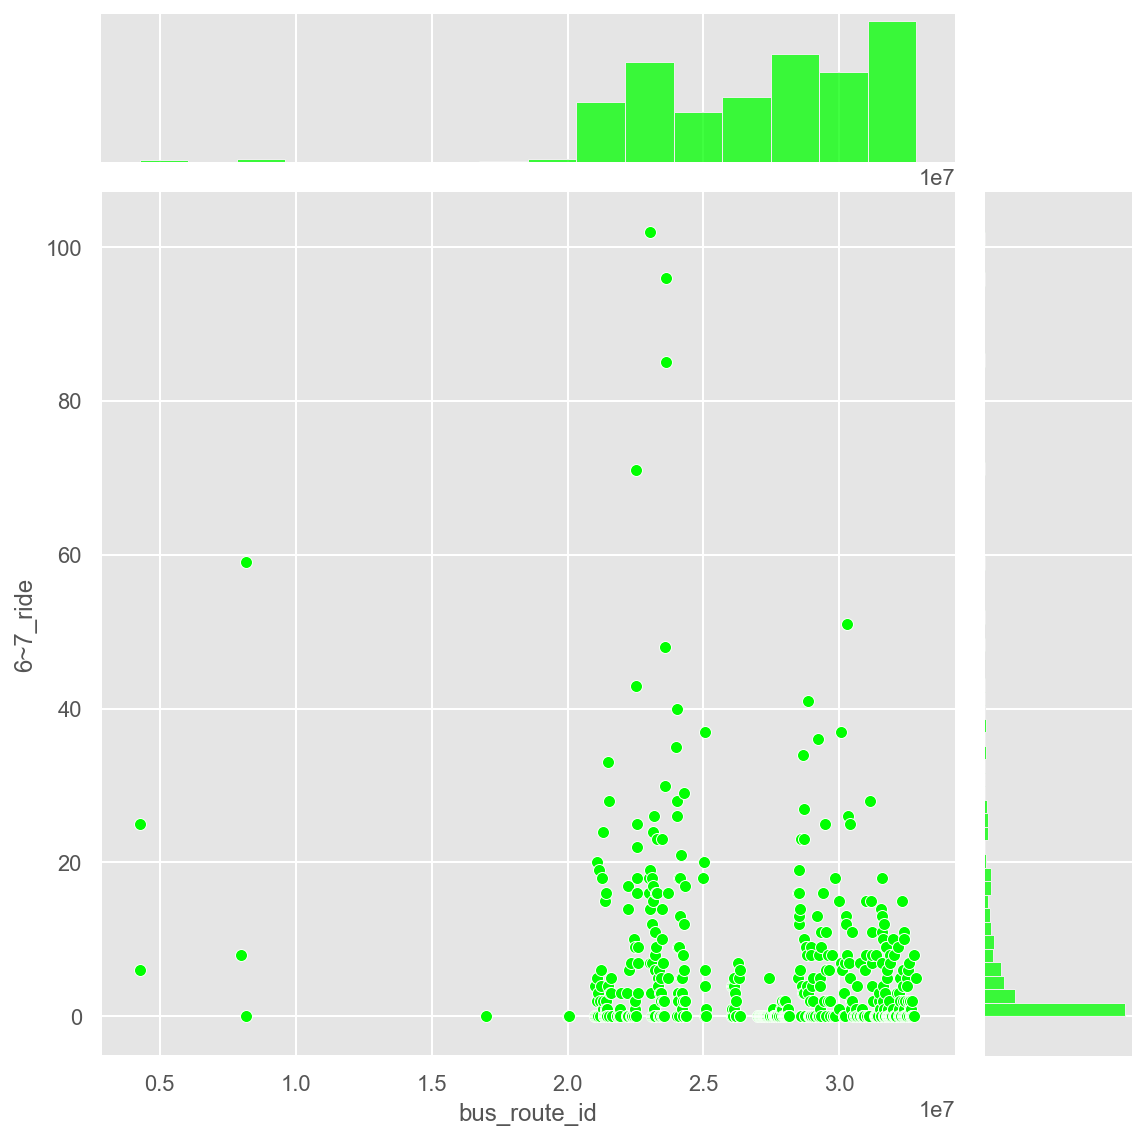

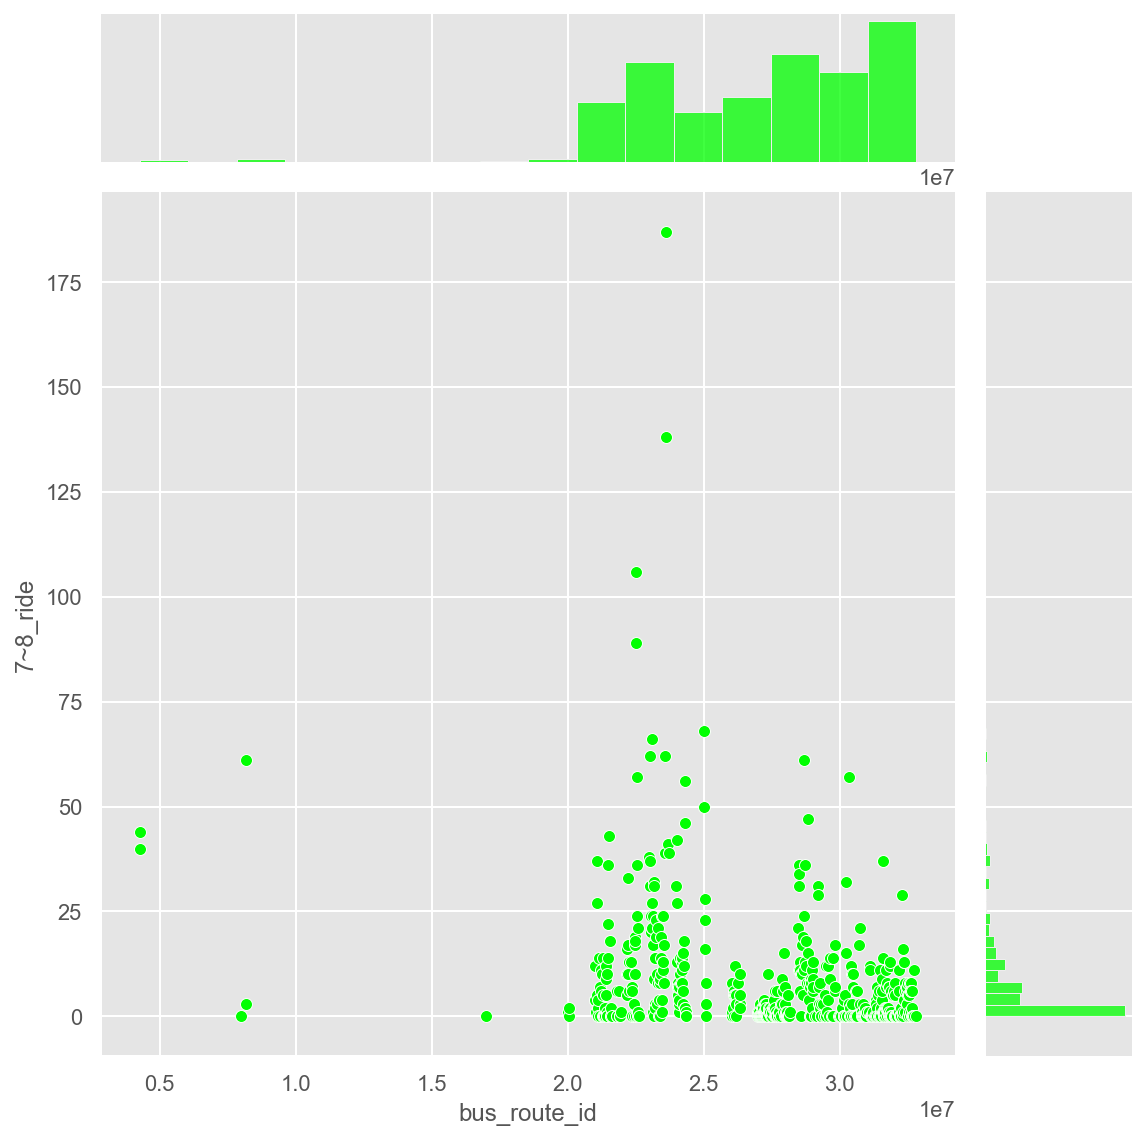

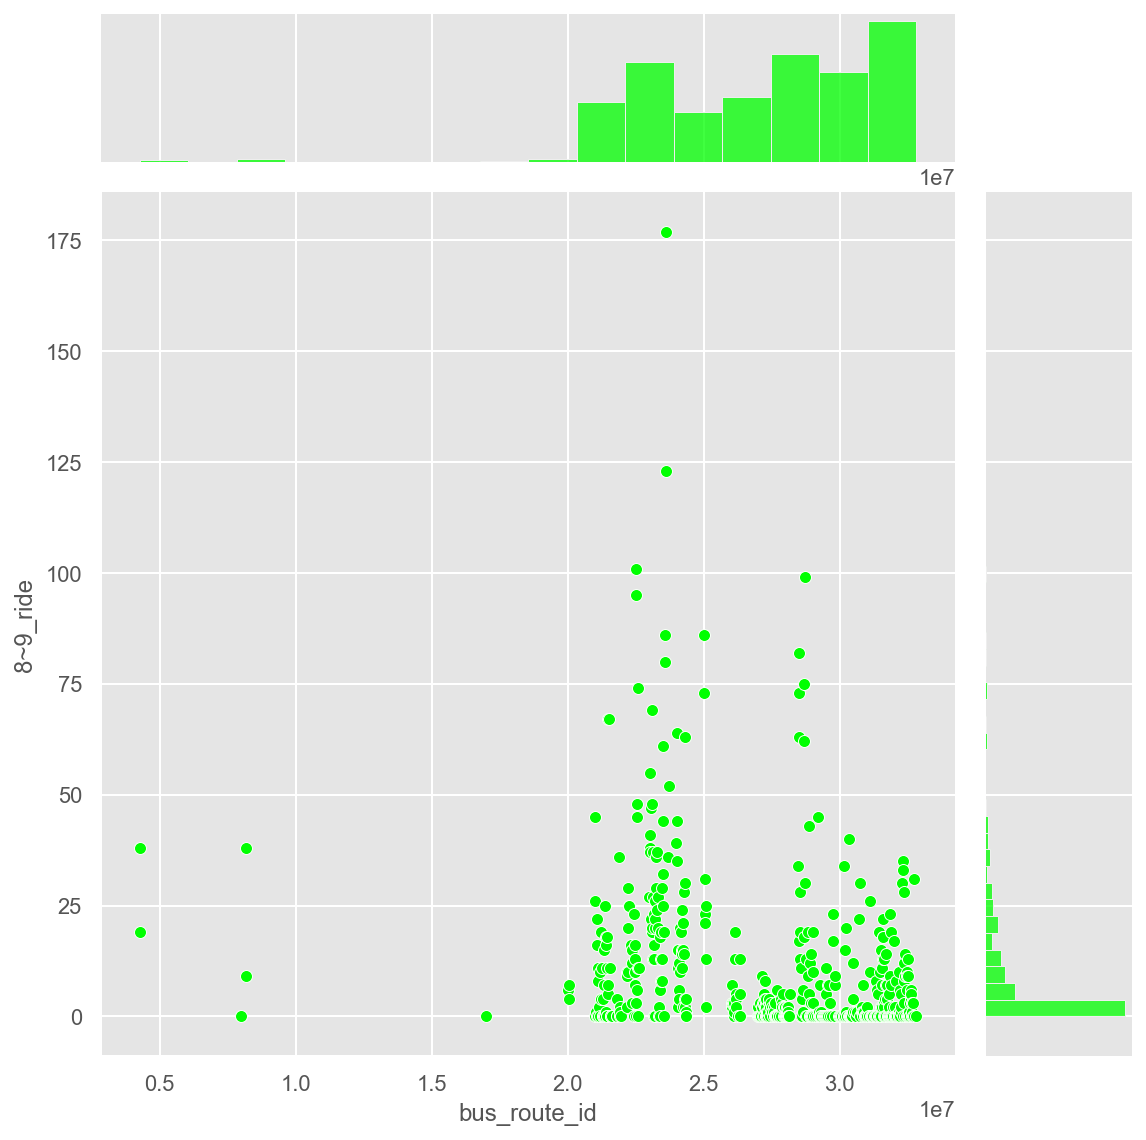

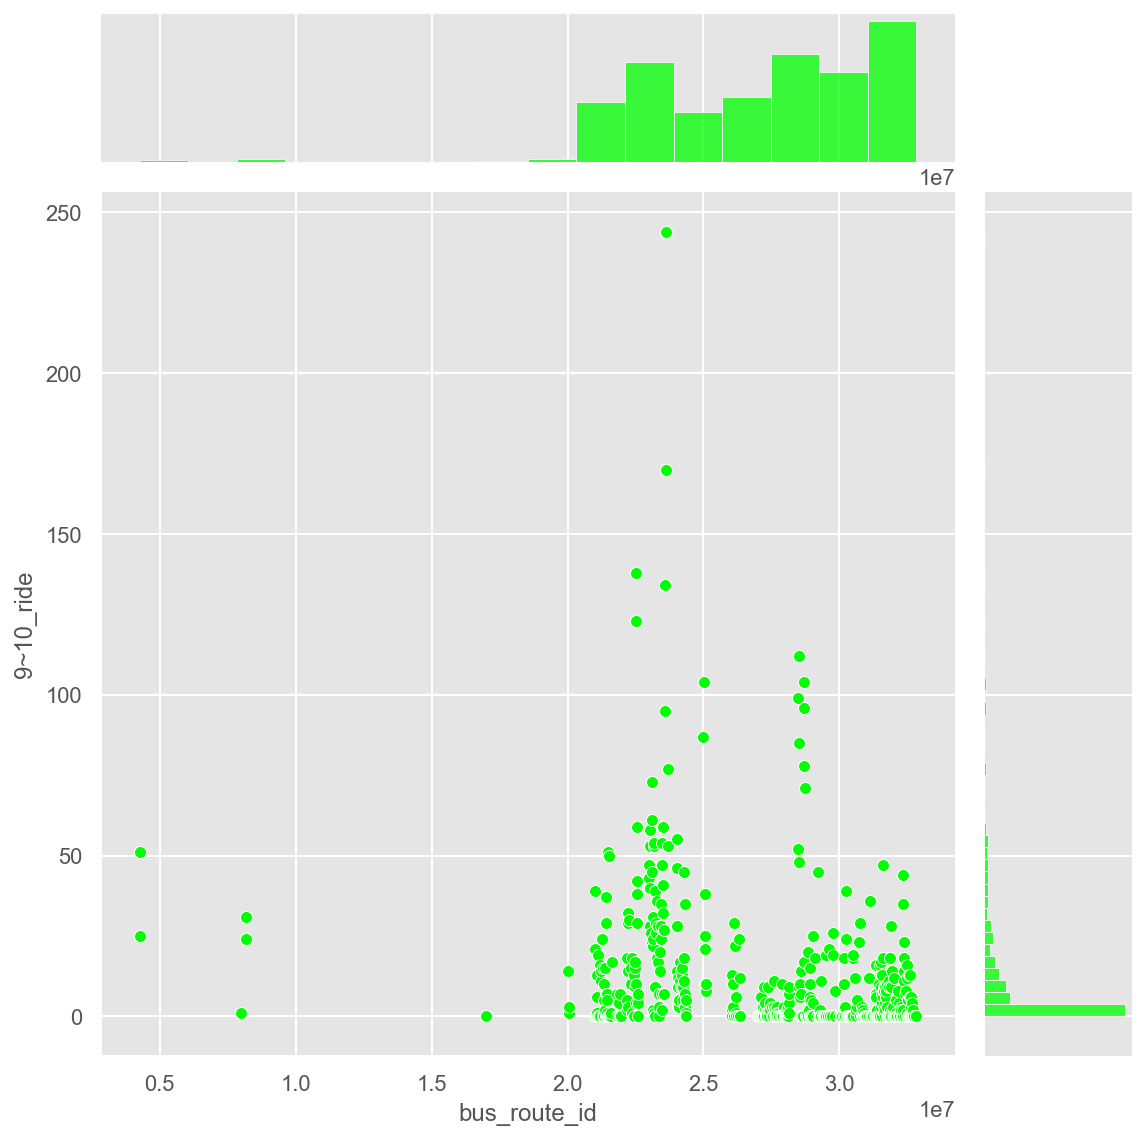

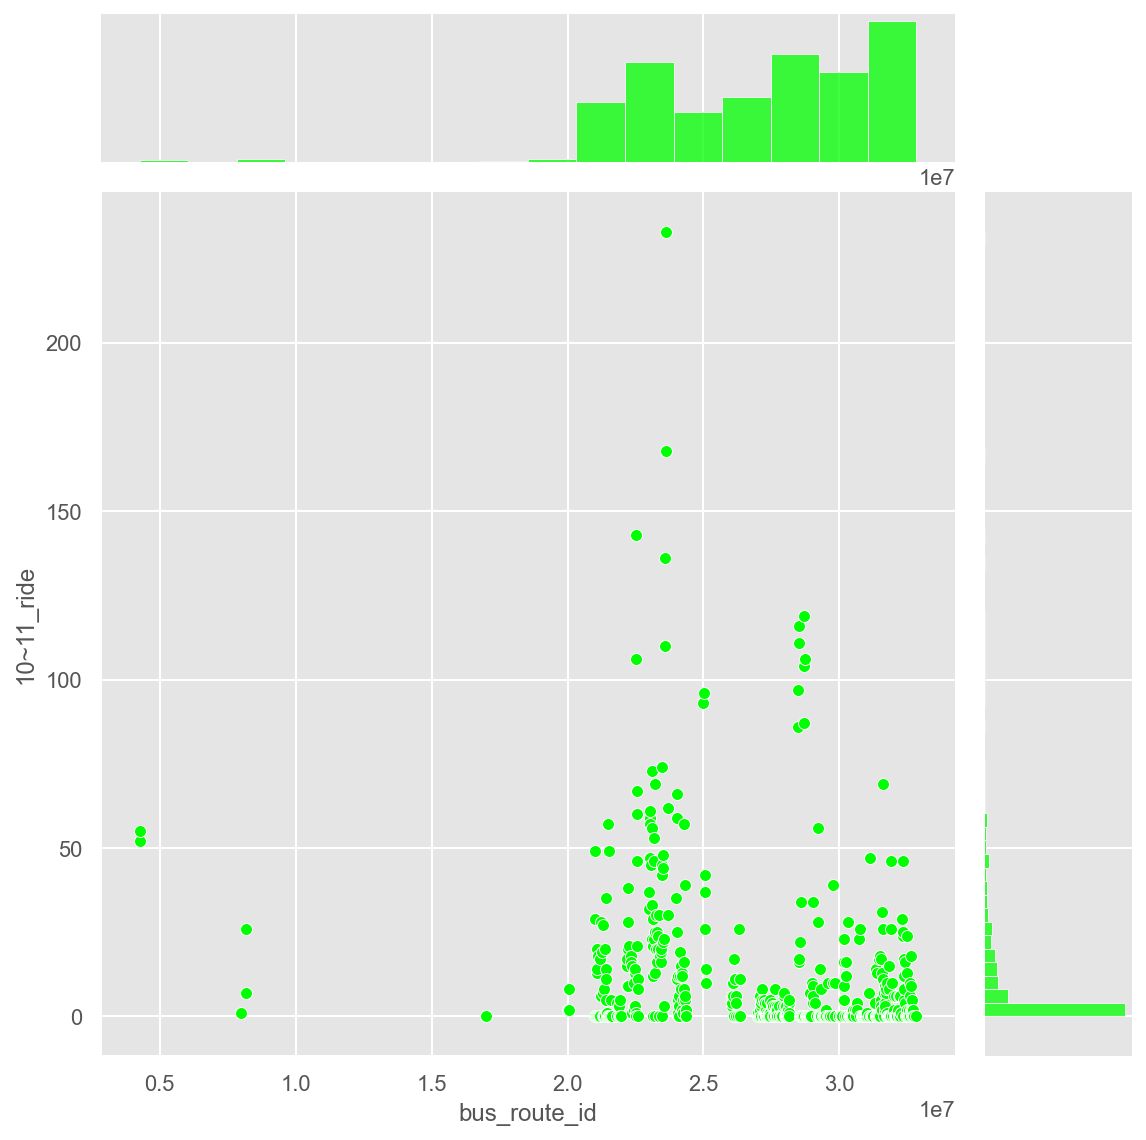

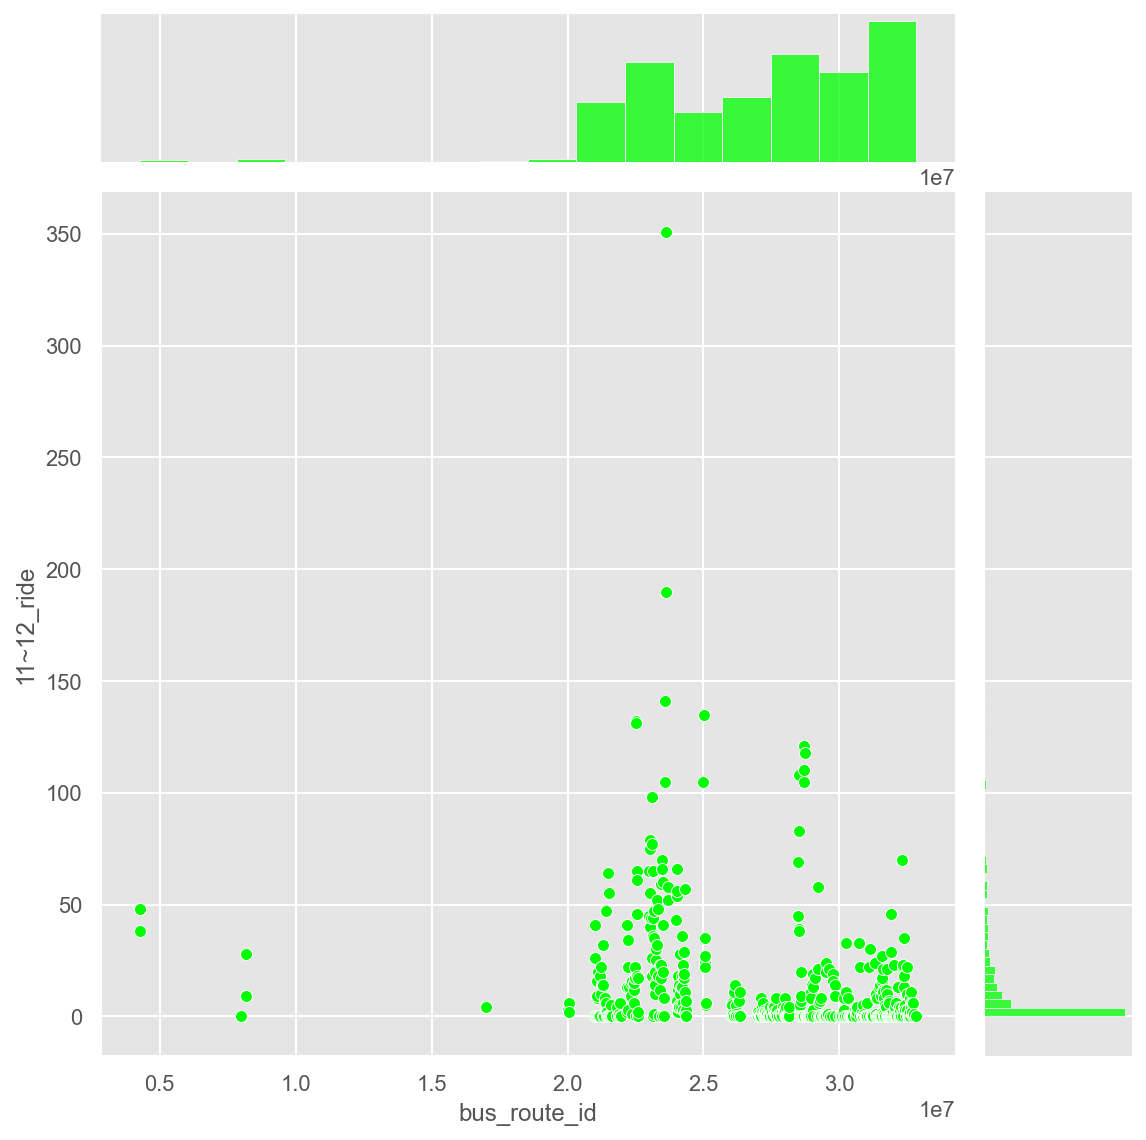

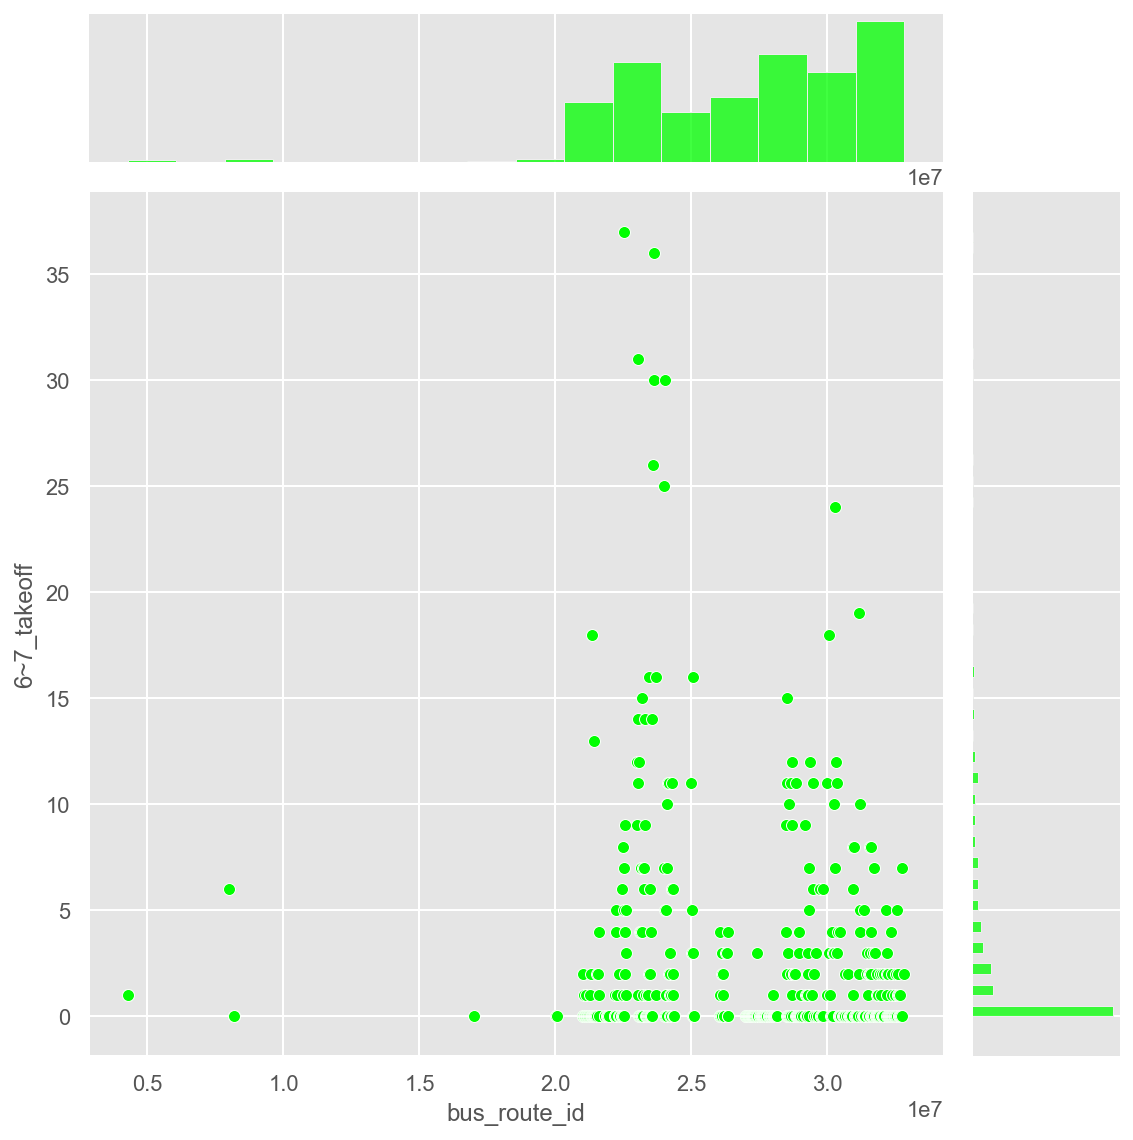

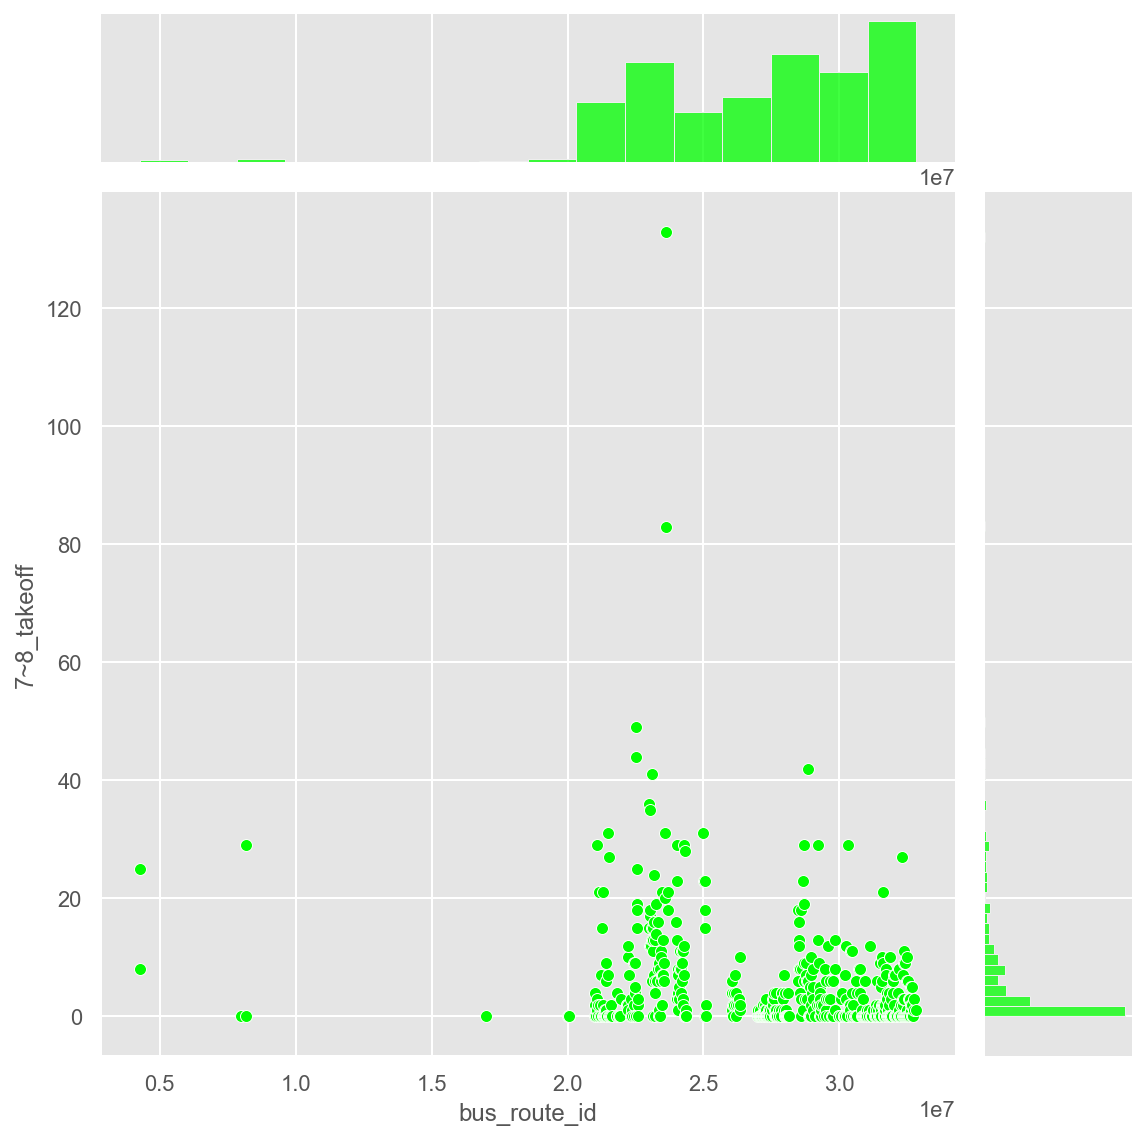

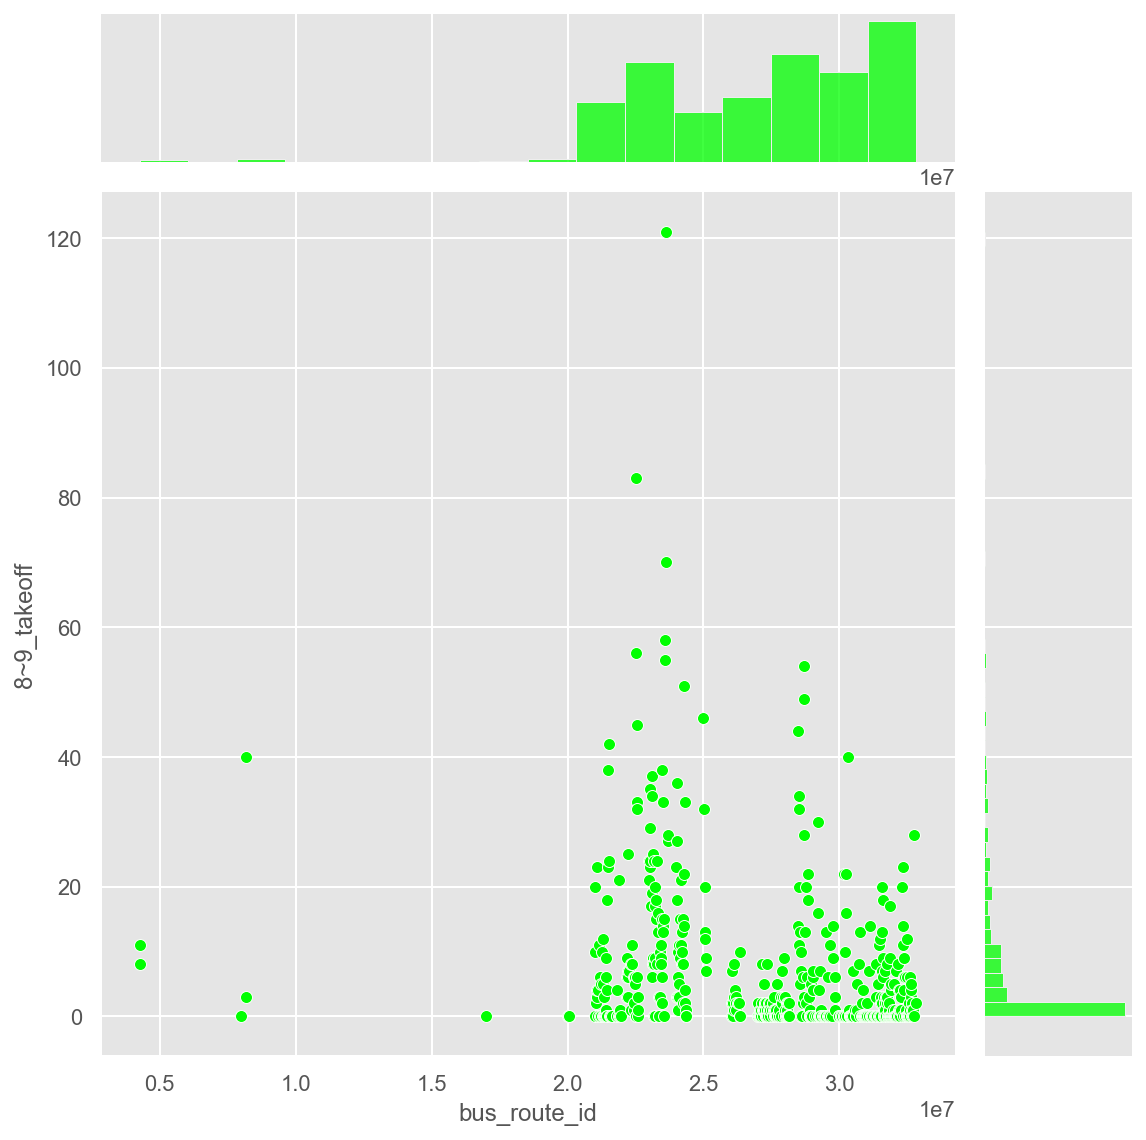

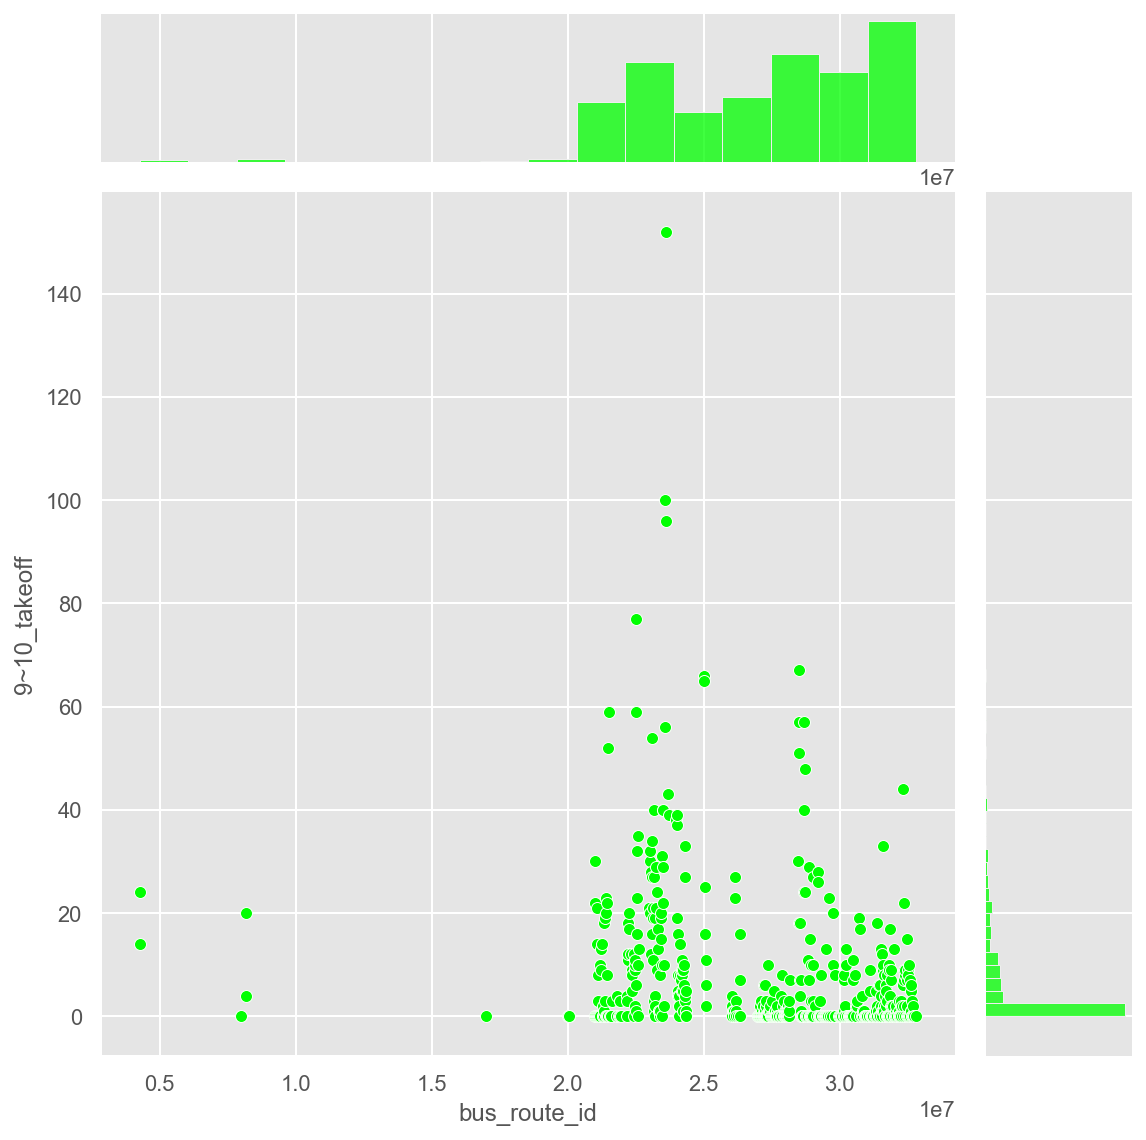

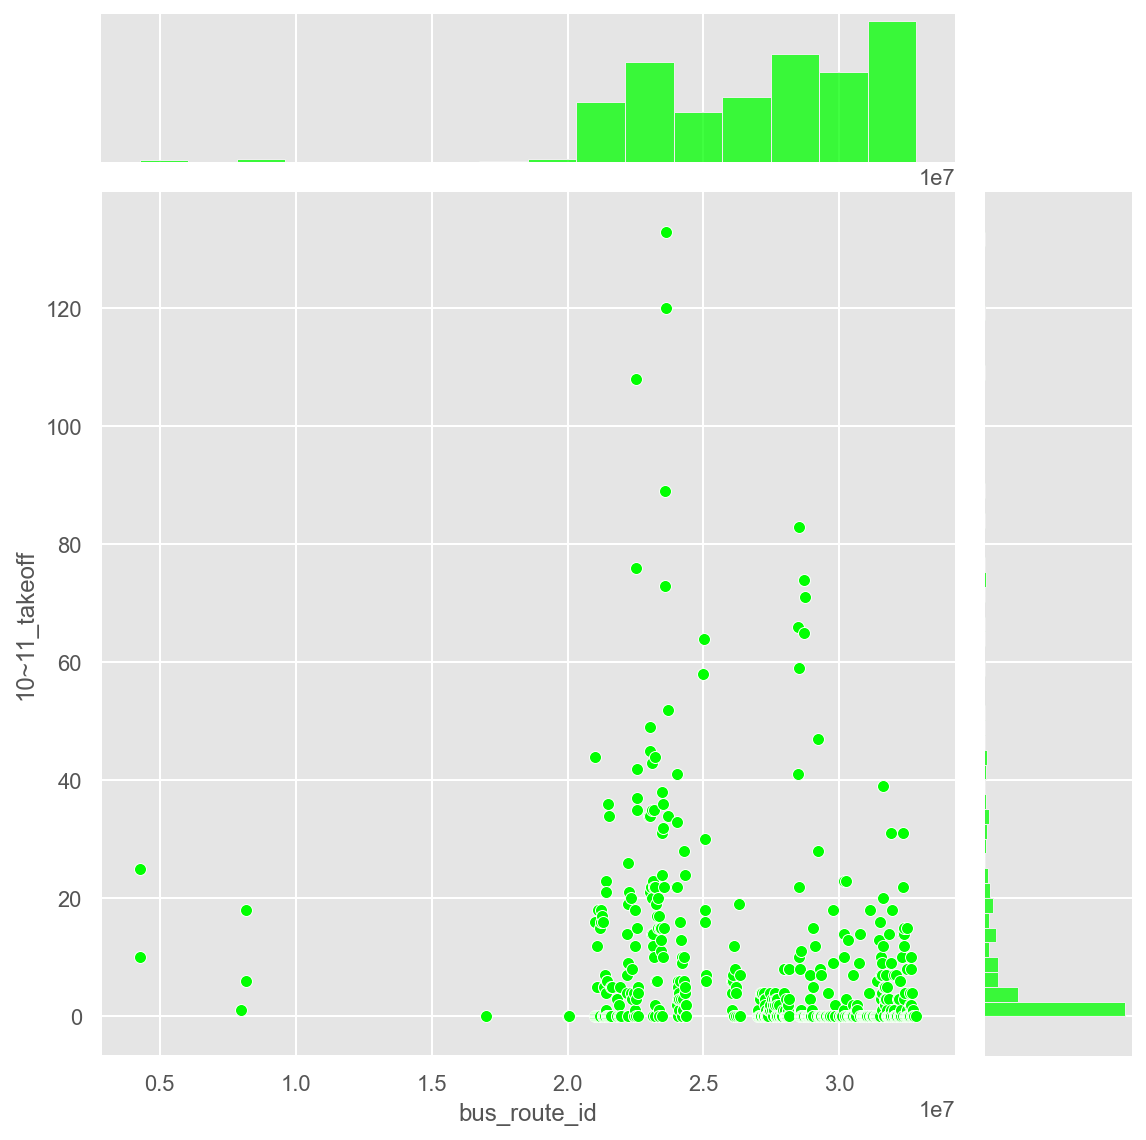

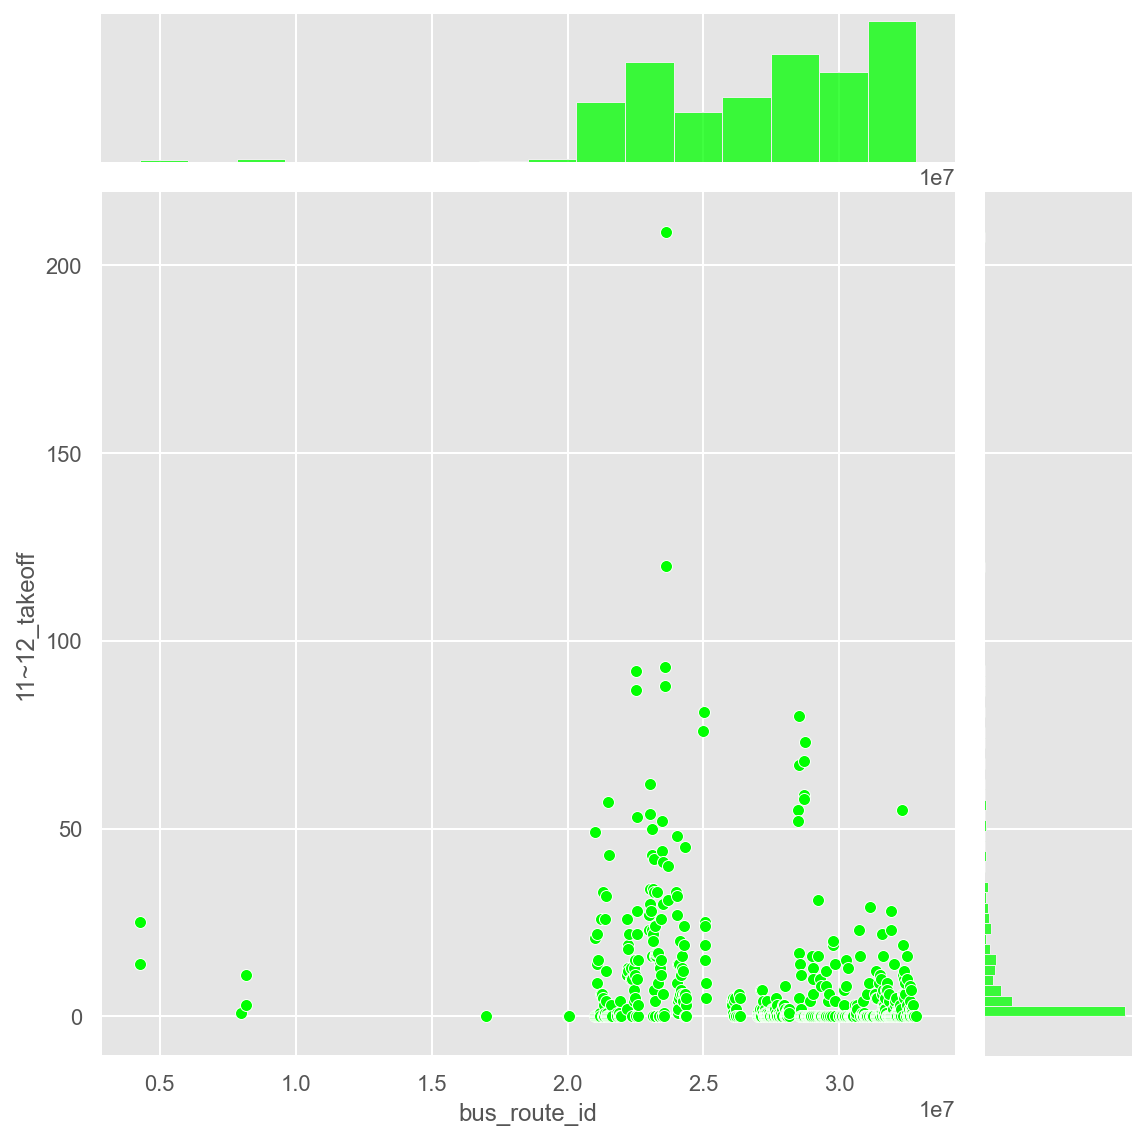

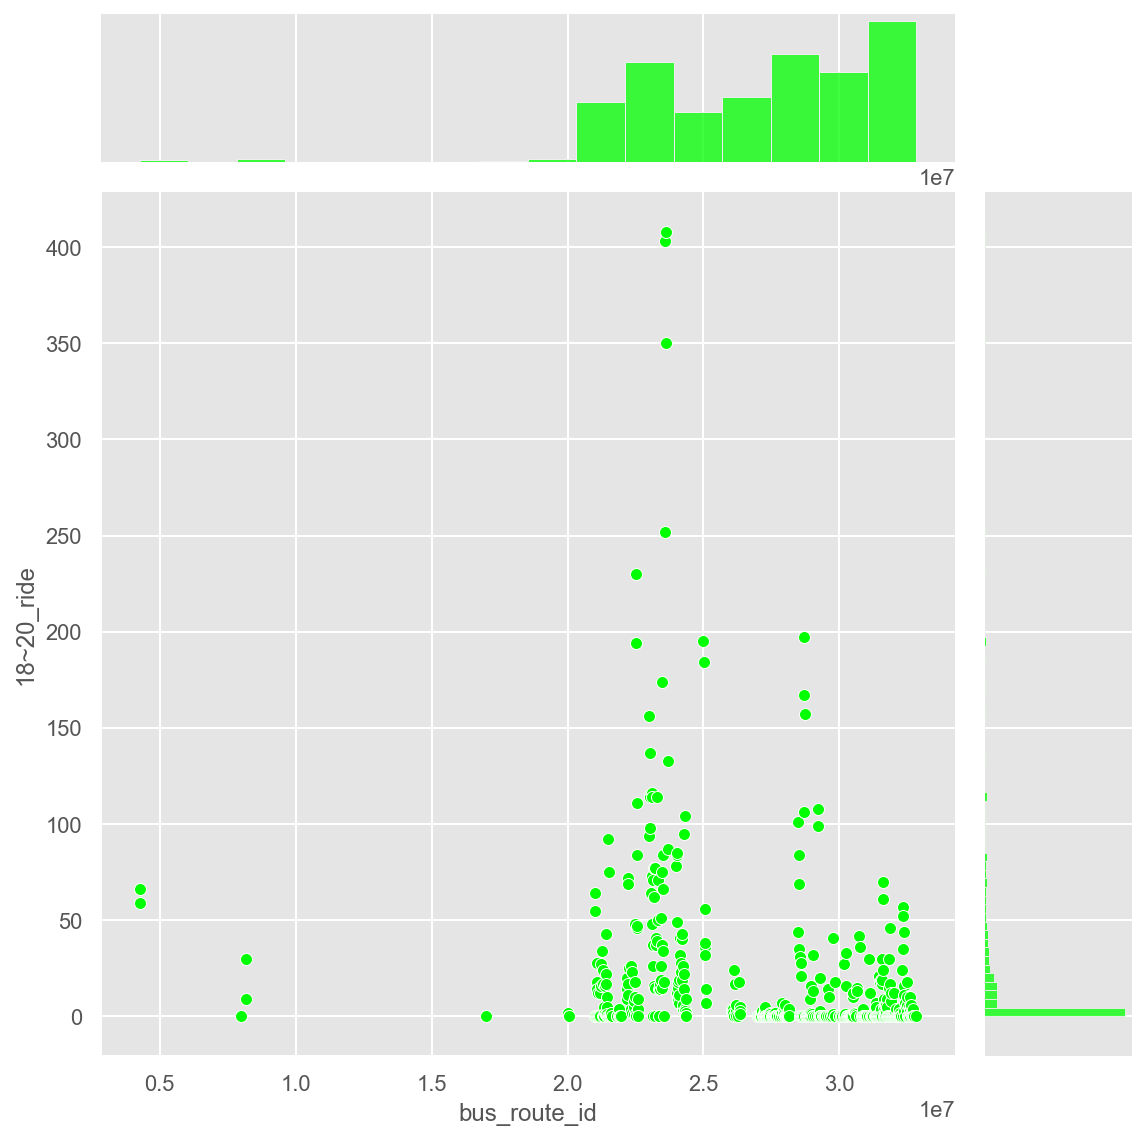

In [48]:
# 확실히 jointplot이 시각적으로 분포가 어디에 집중되어있는지 더 잘 보여준다.
# 9월 12일 노선별/ 시간대별 승,하차 인원수
import matplotlib.pyplot as plt

time = ['6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride',]
for each in time:
    sns.jointplot(x=temp['bus_route_id'], y=temp[each], height=8, color='lime')
    plt.show()

In [62]:
# 노선별 station 갯수!
temp_2 = df[['bus_route_id', 'station_code' ]].groupby(['bus_route_id'],).count()
temp_2

,station_code
bus_route_id,
4270000,776
4280000,928
7990000,130
8170000,353
8180000,385
...,...
32740000,1007
32760000,237
32770000,23


In [68]:
# 노선번호 4270000 기준으로 station 갯수가 776개인데, 여기서 중복을 제외하면 38개밖에 되지 않는다.
print(df[df['bus_route_id'] == 4270000]['station_code'].value_counts())
len(df[df['bus_route_id'] == 4270000]['station_code'].value_counts())

432     30
357     30
1726    30
2843    30
1579    30
2851    30
2494    30
2095    30
344     30
2014    30
2966    30
1660    29
1666    27
2009    27
1648    27
1646    26
2885    25
2094    25
3031    25
2013    24
2114    20
1662    19
1636    19
3173    19
2008    19
4154    18
1943    18
2697    16
2010    16
2699    14
2883    13
2012     8
2972     3
3584     3
2006     2
2021     2
2844     1
2111     1
Name: station_code, dtype: int64


38

In [75]:
# 신뢰성이 떨어지는 하차 정보 제외
passengers_rev = passengers.iloc[:,:6]
passengers_rev

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride
route_1,102.0,20.0,47.0,28.0,57.0,40.0


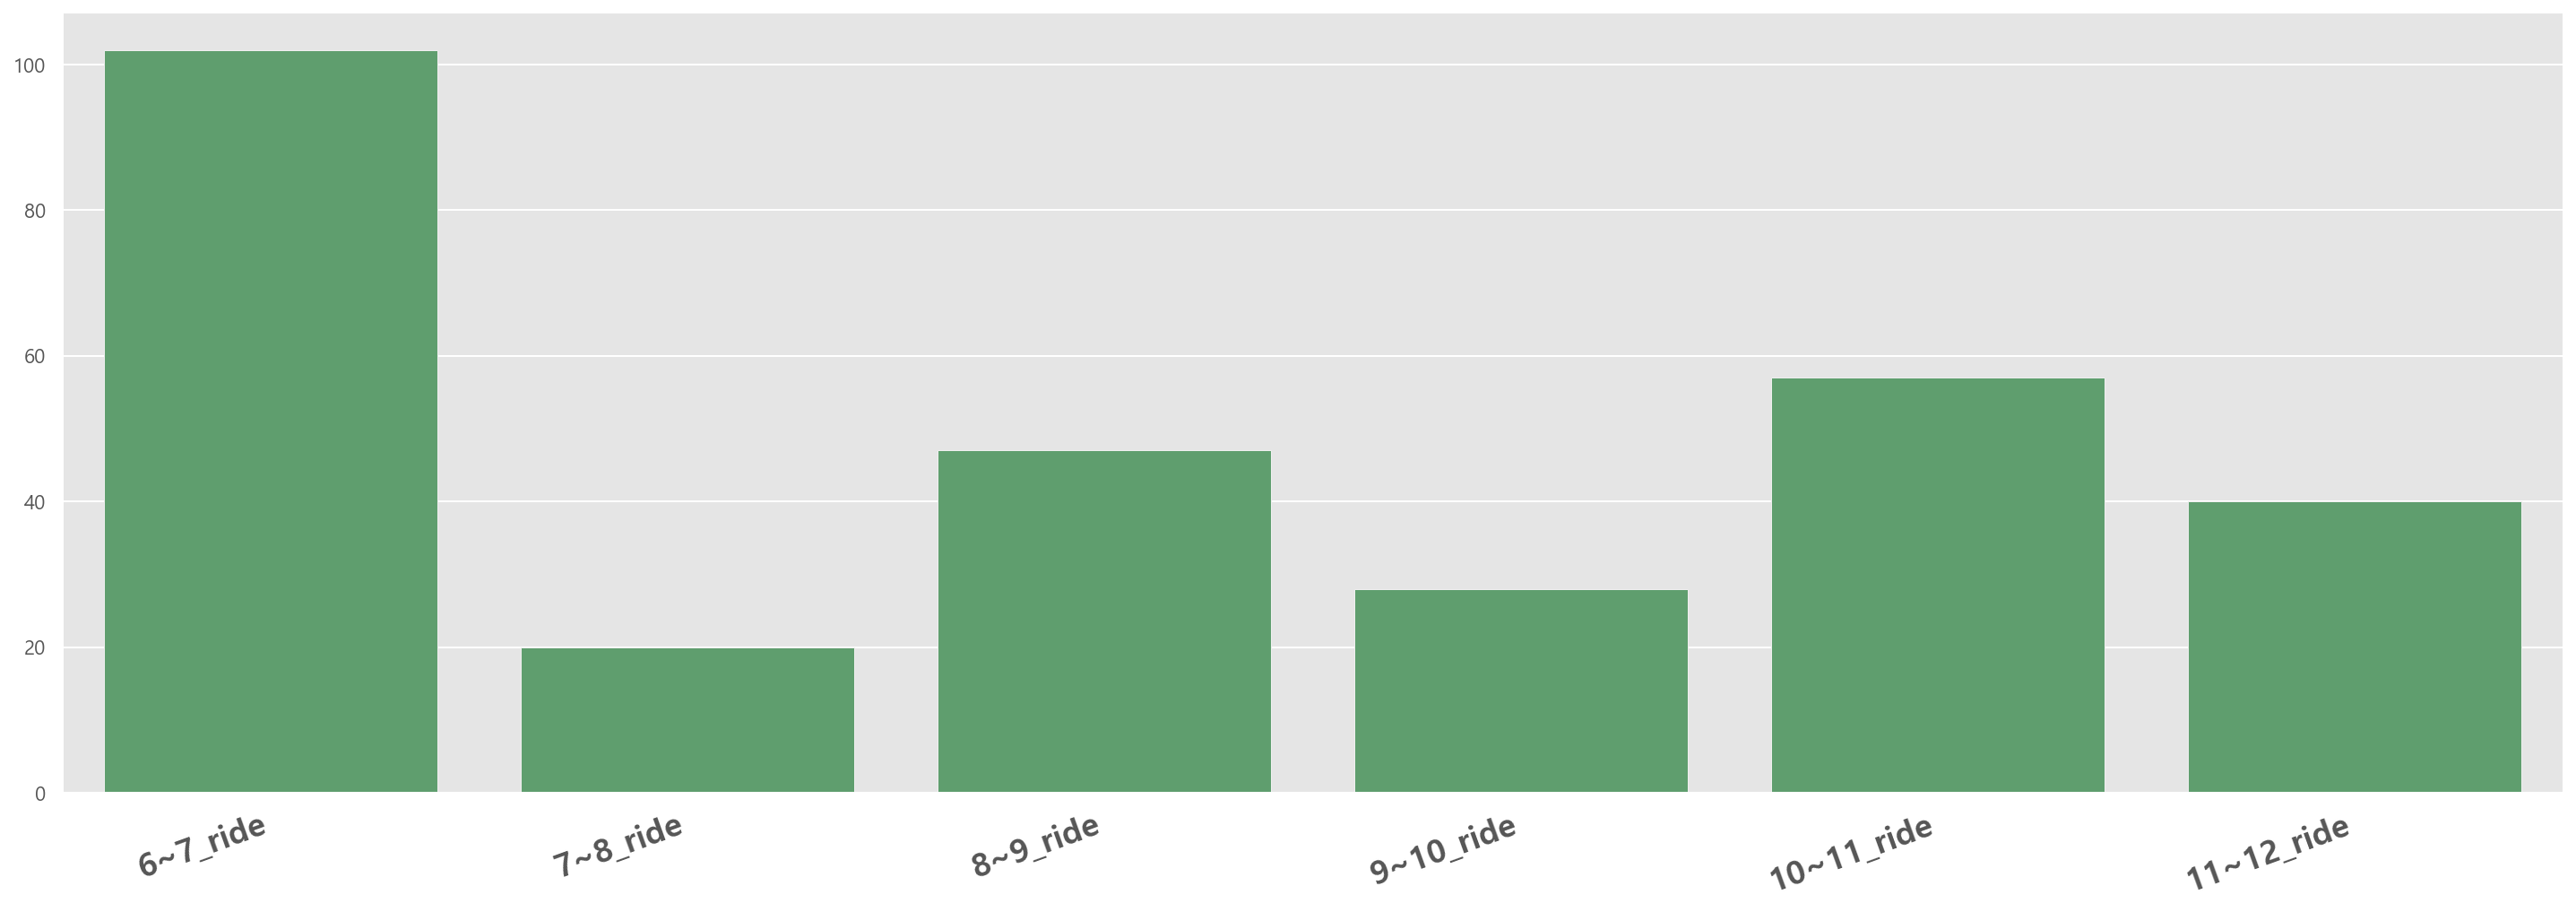

In [78]:
# 신뢰성이 떨어지는 하차 정보 제외
# 해당 노선 시간대별 승차 인원
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.figure(figsize=(25,8))
barplot = sns.barplot(data=passengers_rev, color='g')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=20, 
                          horizontalalignment='right', size=18, weight='bold')
plt.show()

In [86]:
# 신뢰성이 떨어지는 하차 정보 제외
# 정류소별 승차 인원
time = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '18~20_ride', ]

dic_2 = {}
for idx, col in route_1.iterrows():
    keys = []
    values = []
    keys = col['station_name']
    print(keys)
    for each in time:
        values.append(col[each])
    dic_2[keys] = np.sum(values)
    print(dic_2)
    print('---')

국제여객선터미널
{'국제여객선터미널': 80.0}
---
오광로입구
{'국제여객선터미널': 80.0, '오광로입구': 0.0}
---
이호2동
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0}
---
노형우체국
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0}
---
외도초등학교
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0, '외도초등학교': 4.0}
---
내도동동마을
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0, '외도초등학교': 4.0, '내도동동마을': 0.0}
---
현사마을
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0, '외도초등학교': 4.0, '내도동동마을': 0.0, '현사마을': 1.0}
---
하귀초등학교
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0, '외도초등학교': 4.0, '내도동동마을': 0.0, '현사마을': 1.0, '하귀초등학교': 0.0}
---
하귀우체국
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0, '외도초등학교': 4.0, '내도동동마을': 0.0, '현사마을': 1.0, '하귀초등학교': 0.0, '하귀우체국': 1.0}
---
남주동
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0, '외도초등학교': 4.0, '내도동동마을': 0.0, '현사마을': 1.0, '하귀초등학교': 0.0, '하귀우체국': 1.0, '남주동': 1.0}
---
외도부영2차아파트
{'국제여객선터미널': 80.0, '오광로입구': 0.0, '이호2동': 2.0, '노형우체국': 12.0, 

In [88]:
pd.set_option('display.max_columns', 52)
psng_per_stat = pd.DataFrame([dic_2], index=['No of the Passenger'])
psng_per_stat

,국제여객선터미널,오광로입구,이호2동,노형우체국,외도초등학교,내도동동마을,현사마을,하귀초등학교,하귀우체국,남주동,외도부영2차아파트,우령이마을,제주민속오일장입구,월랑입구,제주연안여객터미널,산지변전소,용천마을,제주버스터미널,한국병원,광양사거리,홍랑로입구,동산교,은남동,도호동,제4부두,삼성초등학교,광양,동문로터리(동문시장),중앙로(중앙성당),시민회관,용문마을회관,용문마을,용담1동주민센터,연동주민센터,제주도청신제주로터리,관덕정,월성마을회관,월광로,광평,삼양종점,정든마을,연동입구,대동마을,외도부영1차아파트,제주국제공항(신제주방면),하귀휴먼시아1단지,메종글래드제주,원노형,하귀하나로마트,제6부두,탐라광장,김만덕기념관
No of the Passenger,80.0,0.0,2.0,12.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,6.0,6.0,4.0,16.0,4.0,11.0,0.0,1.0,8.0,7.0,5.0,4.0,3.0,32.0,21.0,8.0,0.0,0.0,0.0,4.0,9.0,0.0,3.0,1.0,2.0,0.0,5.0,0.0,0.0,1.0,35.0,2.0,12.0,6.0,3.0,85.0,0.0,1.0


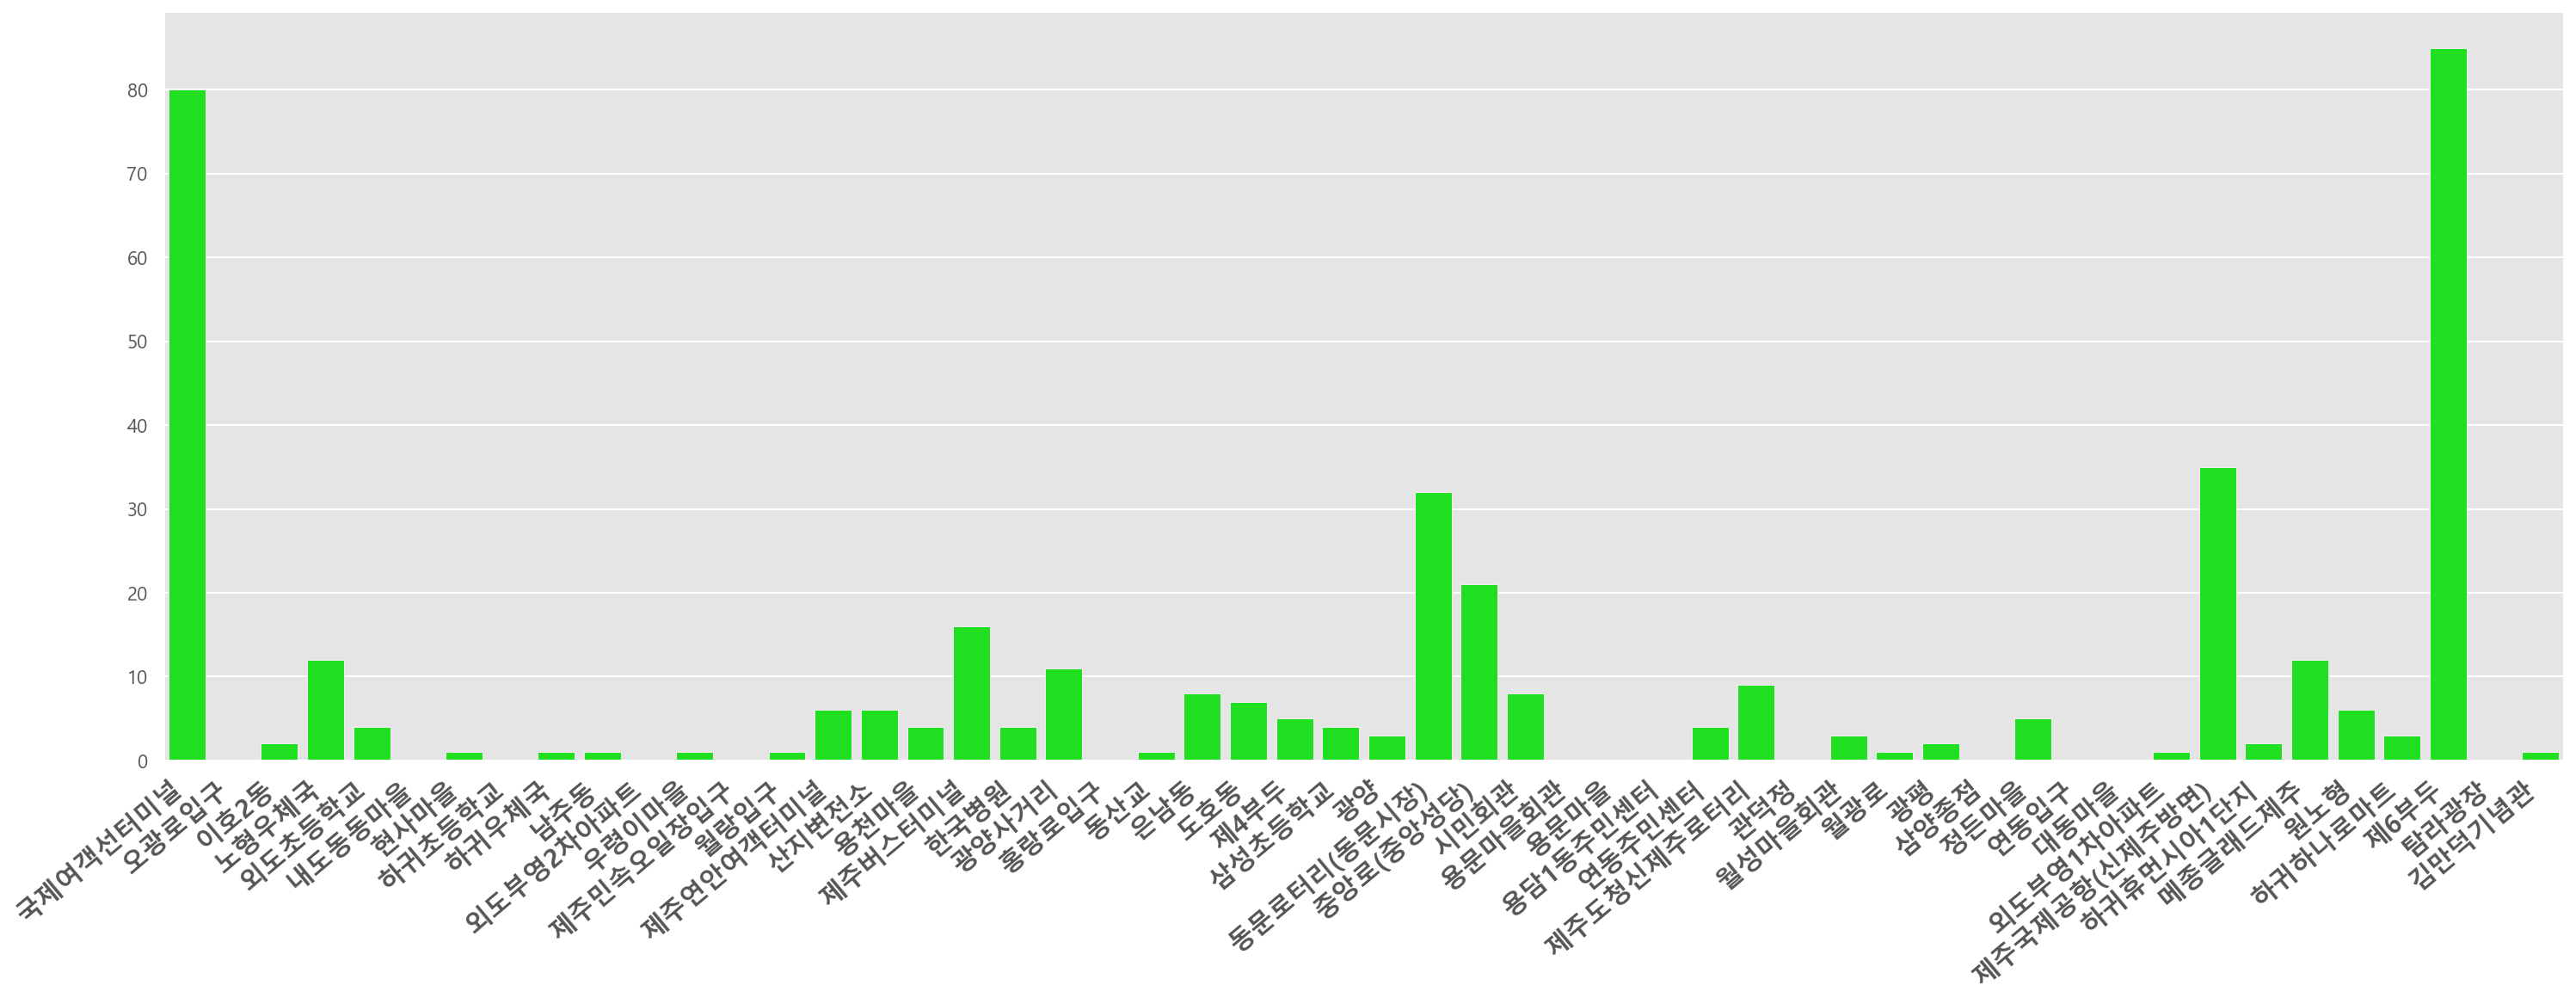

In [91]:
# 신뢰성이 떨어지는 하차 정보 제외
# 정류소별 승차 인원
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.figure(figsize=(25,8))
barplot = sns.barplot(data=psng_per_stat, color='lime')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, 
                          horizontalalignment='right', size=15, weight='bold')
plt.show()

In [107]:
# 9월 12일 23050000노선의 총 승객수
np.sum(psng_per_stat.loc['No of the Passenger'])

408.0

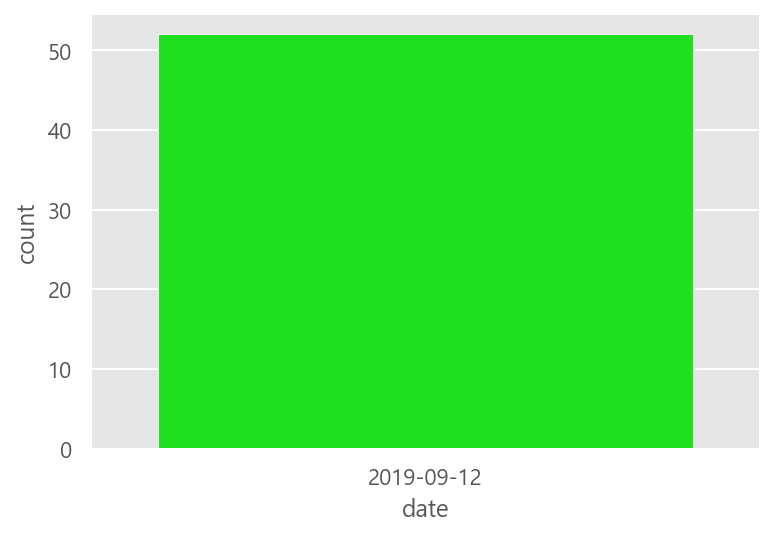

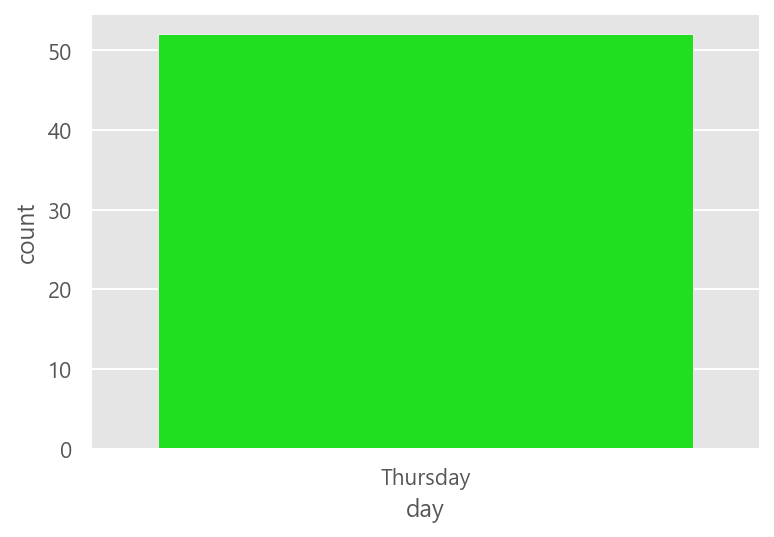

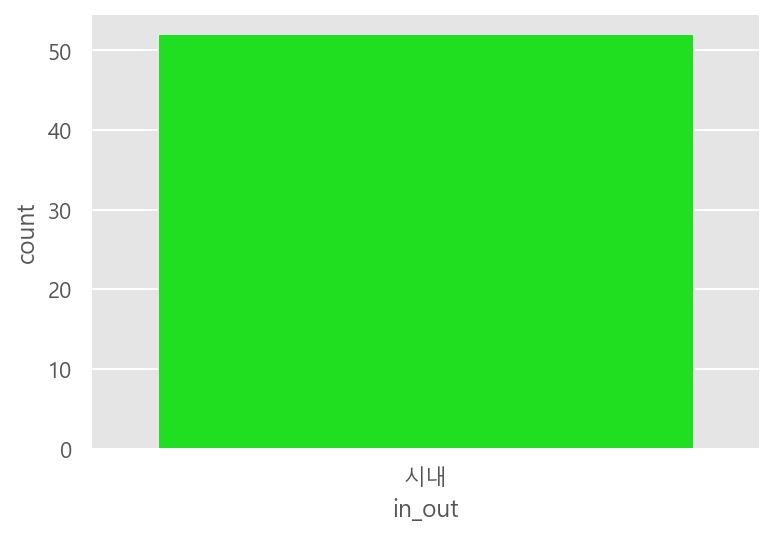

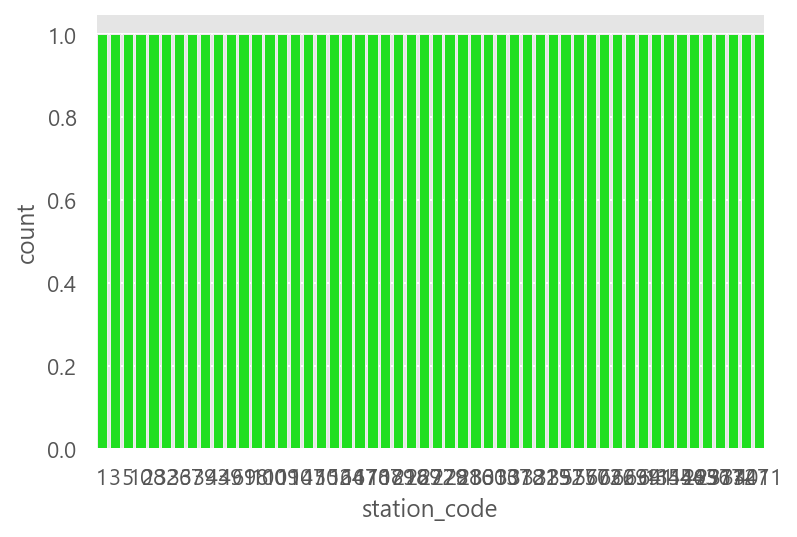

In [94]:
# 9월 12일 23050000노선의 운행일지 디테일
# column별로 value_count
col = ['date', 'day', 'in_out', 'station_code', ]
for each in col:
    sns.countplot(x=each, data=route_1, color='lime')
    plt.show()
# 해당 노선은 이런 특징을 가진다.
# 52개의 데이터(rows)가 있다. 
# 시내버스 only
# 정류소마다 1번씩만 운행된 정보 있다. 
# 총 408명의 승객이 승차했다.